In [171]:
#importación paquetes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
#from xgboost import plot_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [172]:
#Leyendo los datos
cis=pd.read_spss("/Users/fedemaldonado/Desktop/3347.SAV")
cis

,ESTUDIO,REGISTRO,CUES,CCAA,PROV,MUN,CAPITAL,TAMUNI,ENTREV,TIPO_TEL,...,RECUVOTOGR,RECUERDO,ESTUDIOS,RELIGIONR,CNO11R,CLASESUB,PESO,PESOCCAA,PARTIDOCOM1,PARTIDOCOM2
0,3347,18806.0,1.0,Andalucía,Almería,Mun.<=100.000 hab. no capitales de CA o provincia,Otros municipios,Menos o igual a 2.000 habitantes,Anonimizado,Móvil,...,N.C.,N.C.,Sin estudios,Católico/a no practicante,Otra situación inactiva,N.S.,1.19919,1.121980625,NaN,NaN
1,3347,11126.0,2.0,Andalucía,Almería,Mun.<=100.000 hab. no capitales de CA o provincia,Otros municipios,Menos o igual a 2.000 habitantes,Anonimizado,Móvil,...,NaN,No votó,Secundaria 1ª etapa,Católico/a no practicante,Agricultores/as y trabajadores/as agropecuario...,N.S.,0.90517,0.840021578,NaN,NaN
2,3347,14190.0,3.0,Andalucía,Almería,Mun.<=100.000 hab. no capitales de CA o provincia,Otros municipios,Menos o igual a 2.000 habitantes,Anonimizado,Móvil,...,PSOE,PSOE,F.P.,Católico/a no practicante,Jubilado o pensionista (anteriormente ha traba...,Clase media-media,1.01846,1.021513295,NaN,NaN
3,3347,1307.0,4.0,Andalucía,Almería,Almería / Barakaldo,Capital de provincia,100.001 a 400.000 habitantes,Anonimizado,Móvil,...,NaN,No recuerda,F.P.,Católico/a no practicante,Jubilado o pensionista (anteriormente ha traba...,Clase media-baja,1.01846,1.021513295,NaN,NaN
4,3347,2238.0,5.0,Andalucía,Almería,Almería / Barakaldo,Capital de provincia,100.001 a 400.000 habitantes,Anonimizado,Móvil,...,Ciudadanos,C's,F.P.,Católico/a no practicante,Personal de apoyo administrativo,Clase media-media,0.99364,0.965683406,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3347,11561.0,3773.0,Melilla (Ciudad Autónoma de),Melilla,Ceuta / Melilla,Capital de CC.AA.,50.001 a 100.000 habitantes,Anonimizado,Fijo,...,PP,PP,Superiores,Católico/a practicante,Ocupaciones militares y cuerpos policiales,Clase alta y media alta,1.02325,0.782072017,NaN,NaN
3773,3347,12234.0,3774.0,Melilla (Ciudad Autónoma de),Melilla,Ceuta / Melilla,Capital de CC.AA.,50.001 a 100.000 habitantes,Anonimizado,Móvil,...,PSOE,PSOE,Secundaria 2ª etapa,Creyente de otra religión,Trabajo doméstico no remunerado,Clase baja/pobre,1.27501,1.227808451,NaN,NaN
3774,3347,14383.0,3775.0,Melilla (Ciudad Autónoma de),Melilla,Ceuta / Melilla,Capital de CC.AA.,50.001 a 100.000 habitantes,Anonimizado,Fijo,...,NaN,No votó,Secundaria 2ª etapa,Católico/a no practicante,Parados/as,Otras,1.26036,0.856152287,NaN,PP/Ciudadanos/Ninguno
3775,3347,15693.0,3776.0,Melilla (Ciudad Autónoma de),Melilla,Ceuta / Melilla,Capital de CC.AA.,50.001 a 100.000 habitantes,Anonimizado,Móvil,...,NaN,No tenía derecho a voto,Sin estudios,Creyente de otra religión,Trabajo doméstico no remunerado,Clase media-media,1.12326,0.906158794,NaN,NaN


In [173]:
#Selección de variables a estudiar
cis1=cis.loc[
    :,
    [
        "SEXO","EDAD","CCAA","P0","P1","P5","P9","LIDERESVALORA_1","LIDERESVALORA_2","LIDERESVALORA_3","LIDERESVALORA_4",
        "LIDERESVALORA_5","LIDERESVALORA_6","ECOESP","ECOPER","CONFIANZAPTE","CONFIANZAOPOSIC","PREFPTE","INTENCIONG",
        "INTENCIONGALTER","SIMPATIA","ESCIDEOL","ESCAIDEOLLIDERES_1","ESCAIDEOLLIDERES_2","ESCAIDEOLLIDERES_3",
        "ESCAIDEOLLIDERES_4","ESCAIDEOLLIDERES_5","ESCAIDEOLLIDERES_6","VALORALIDERES_1","VALORALIDERES_2","VALORALIDERES_3",
        "VALORALIDERES_4","VALORALIDERES_5","VALORALIDERES_6","PARTICIPACIONG","RECUVOTOG","CERCANIA","NIVELESTENTREV",
        "RELIGION","ECIVIL","SITLAB","CLASESOCIAL","PESO"
    ]
] 
cis1

,SEXO,EDAD,CCAA,P0,P1,P5,P9,LIDERESVALORA_1,LIDERESVALORA_2,LIDERESVALORA_3,...,VALORALIDERES_6,PARTICIPACIONG,RECUVOTOG,CERCANIA,NIVELESTENTREV,RELIGION,ECIVIL,SITLAB,CLASESOCIAL,PESO
0,Mujer,79.0,Andalucía,La nacionalidad española,Nada,"Sí, ya me he vacunado",Ambos en colaboración,N.C.,N.S.,N.S.,...,N.S.,Fue a votar y votó,N.C.,N.C.,NaN,Católico/a no practicante,Separado/a,Pensionista (anteriormente no ha trabajado),"No sabe, duda",1.19919
1,Hombre,56.0,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de las comunidades autónomas,1 Muy mal,1 Muy mal,1 Muy mal,...,1 Muy mal,Prefirió no votar/Me abstuve,NaN,Ninguno,"Educación secundaria (ESO, EGB. Graduado Escol...",Católico/a no practicante,Soltero/a,Trabaja,"No sabe, duda",0.90517
2,Hombre,65.0,Andalucía,La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,5,2,4,...,2,Fue a votar y votó,PSOE,PSOE,FP de Grado Medio (ciclo/módulo formativo de F...,Católico/a no practicante,Casado/a,Jubilado/a o pensionista (anteriormente ha tra...,Clase media-media,1.01846
3,Hombre,72.0,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,8,4,10 Muy bien,...,10 Muy bien,No recuerda,NaN,Podemos,FP de Grado Superior (ciclo/módulo formativo d...,Católico/a no practicante,Viudo/a,Jubilado/a o pensionista (anteriormente ha tra...,Clase media-baja,1.01846
4,Hombre,38.0,Andalucía,La nacionalidad española,Poco,"Sí, ya me he vacunado",Ambos en colaboración,3,3,3,...,3,Fue a votar y votó,Ciudadanos,Ciudadanos,FP de Grado Superior (ciclo/módulo formativo d...,Católico/a no practicante,Soltero/a,Trabaja,Clase media-media,0.99364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Hombre,62.0,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,4,5,3,...,1 Muy mal,Fue a votar y votó,PP,PP,Licenciatura (titulaciones con equivalencia of...,Católico/a practicante,Casado/a,Trabaja,Clase media-alta,1.02325
3773,Mujer,36.0,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,5,5,5,...,1 Muy mal,Fue a votar y votó,PSOE,PSOE,"Bachillerato (Bachillerato LOGSE, BUP, Bachill...",Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase baja,1.27501
3774,Hombre,22.0,Melilla (Ciudad Autónoma de),La nacionalidad española,(NO LEER) Regular,"Sí, ya me he vacunado","Médicos/as, científicos/as y expertos/as en sa...",1 Muy mal,1 Muy mal,1 Muy mal,...,3,Prefirió no votar/Me abstuve,NaN,Ciudadanos,"Bachillerato (Bachillerato LOGSE, BUP, Bachill...",Católico/a no practicante,Soltero/a,En paro y busca su primer empleo,Otras,1.26036
3775,Hombre,36.0,Melilla (Ciudad Autónoma de),La nacionalidad española y otra,Mucho,"Sí, ya me he vacunado",Otras respuestas,2,4,6,...,10 Muy bien,No tenía derecho a voto,NaN,PSOE,NaN,Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase media-media,1.12326


In [174]:
#Renombramos las columnas
cis1.columns= [
    "Sexo", "Edad", "Comunidad Autónoma", "Nacionalidad", "Preocupación sobre el Covid","Vacunación Covid",
    "Cargo de la Pandemia","Valoración Covid PS","Valoración Covid PC","Valoración Covid YD","Valoración Covid SA",
    "Valoración Covid IA","Valoración Covid IE","Economía Nacional","Economía Personal","Confianza Gobierno",
    "Confianza Oposición","Preferencia Presidencia","Intención Voto","Voto Alternativo","Simpatía partidista",
    "Ideología personal","Ideología PS","Ideología PC","Ideología YD","Ideología SA","Ideología IA","Ideología IE",
    "Valoración PS","Valoración PC","Valoración YD","Valoración SA","Valoración IA","Valoración IE",
    "Participación Elecciones Anteriores","Voto anterior","Cercanía partidista","Nivel de estudios","Religión",
    "Estado Civil","Situación Laboral","Clase Social","Peso"
]
cis1

,Sexo,Edad,Comunidad Autónoma,Nacionalidad,Preocupación sobre el Covid,Vacunación Covid,Cargo de la Pandemia,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,...,Valoración IE,Participación Elecciones Anteriores,Voto anterior,Cercanía partidista,Nivel de estudios,Religión,Estado Civil,Situación Laboral,Clase Social,Peso
0,Mujer,79.0,Andalucía,La nacionalidad española,Nada,"Sí, ya me he vacunado",Ambos en colaboración,N.C.,N.S.,N.S.,...,N.S.,Fue a votar y votó,N.C.,N.C.,NaN,Católico/a no practicante,Separado/a,Pensionista (anteriormente no ha trabajado),"No sabe, duda",1.19919
1,Hombre,56.0,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de las comunidades autónomas,1 Muy mal,1 Muy mal,1 Muy mal,...,1 Muy mal,Prefirió no votar/Me abstuve,NaN,Ninguno,"Educación secundaria (ESO, EGB. Graduado Escol...",Católico/a no practicante,Soltero/a,Trabaja,"No sabe, duda",0.90517
2,Hombre,65.0,Andalucía,La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,5,2,4,...,2,Fue a votar y votó,PSOE,PSOE,FP de Grado Medio (ciclo/módulo formativo de F...,Católico/a no practicante,Casado/a,Jubilado/a o pensionista (anteriormente ha tra...,Clase media-media,1.01846
3,Hombre,72.0,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,8,4,10 Muy bien,...,10 Muy bien,No recuerda,NaN,Podemos,FP de Grado Superior (ciclo/módulo formativo d...,Católico/a no practicante,Viudo/a,Jubilado/a o pensionista (anteriormente ha tra...,Clase media-baja,1.01846
4,Hombre,38.0,Andalucía,La nacionalidad española,Poco,"Sí, ya me he vacunado",Ambos en colaboración,3,3,3,...,3,Fue a votar y votó,Ciudadanos,Ciudadanos,FP de Grado Superior (ciclo/módulo formativo d...,Católico/a no practicante,Soltero/a,Trabaja,Clase media-media,0.99364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Hombre,62.0,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,4,5,3,...,1 Muy mal,Fue a votar y votó,PP,PP,Licenciatura (titulaciones con equivalencia of...,Católico/a practicante,Casado/a,Trabaja,Clase media-alta,1.02325
3773,Mujer,36.0,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,5,5,5,...,1 Muy mal,Fue a votar y votó,PSOE,PSOE,"Bachillerato (Bachillerato LOGSE, BUP, Bachill...",Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase baja,1.27501
3774,Hombre,22.0,Melilla (Ciudad Autónoma de),La nacionalidad española,(NO LEER) Regular,"Sí, ya me he vacunado","Médicos/as, científicos/as y expertos/as en sa...",1 Muy mal,1 Muy mal,1 Muy mal,...,3,Prefirió no votar/Me abstuve,NaN,Ciudadanos,"Bachillerato (Bachillerato LOGSE, BUP, Bachill...",Católico/a no practicante,Soltero/a,En paro y busca su primer empleo,Otras,1.26036
3775,Hombre,36.0,Melilla (Ciudad Autónoma de),La nacionalidad española y otra,Mucho,"Sí, ya me he vacunado",Otras respuestas,2,4,6,...,10 Muy bien,No tenía derecho a voto,NaN,PSOE,NaN,Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase media-media,1.12326


In [175]:
cis1.iloc[:,31].drop_duplicates()

0            N.S.
1               7
2       1 Muy mal
4               3
6               6
9               2
10              4
18              5
33              9
39    10 Muy bien
45           N.C.
49              8
93            NaN
Name: Valoración SA, dtype: category
Categories (12, object): ['1 Muy mal', '10 Muy bien', '2', '3', ..., '8', '9', 'N.C.', 'N.S.']

### Identificación de valores nulos

In [176]:
#Identificamos qué columnas tienen NAN
cis1.isnull().any()

Sexo                                   False
Edad                                   False
Comunidad Autónoma                     False
Nacionalidad                           False
Preocupación sobre el Covid            False
Vacunación Covid                       False
Cargo de la Pandemia                   False
Valoración Covid PS                     True
Valoración Covid PC                     True
Valoración Covid YD                     True
Valoración Covid SA                     True
Valoración Covid IA                     True
Valoración Covid IE                     True
Economía Nacional                      False
Economía Personal                      False
Confianza Gobierno                     False
Confianza Oposición                    False
Preferencia Presidencia                False
Intención Voto                         False
Voto Alternativo                        True
Simpatía partidista                     True
Ideología personal                     False
Ideología 

In [177]:
cis_sin_peso = cis1.drop("Peso",axis=1)

<AxesSubplot:>

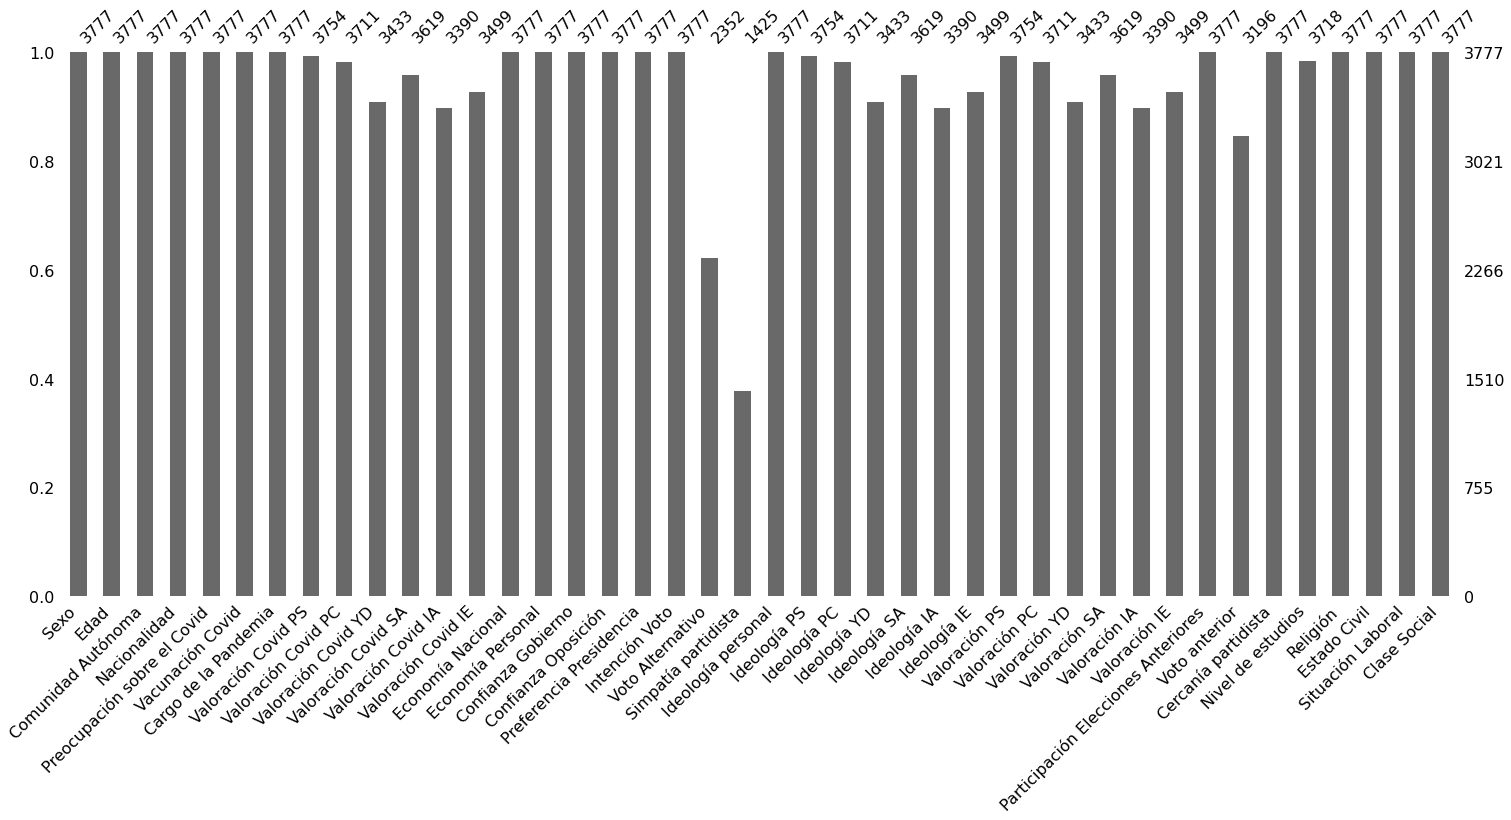

In [178]:
#Importamos package para missing values
import missingno as msno
msno.bar(cis_sin_peso)

Matriz de Correlación de nulos

<AxesSubplot:>

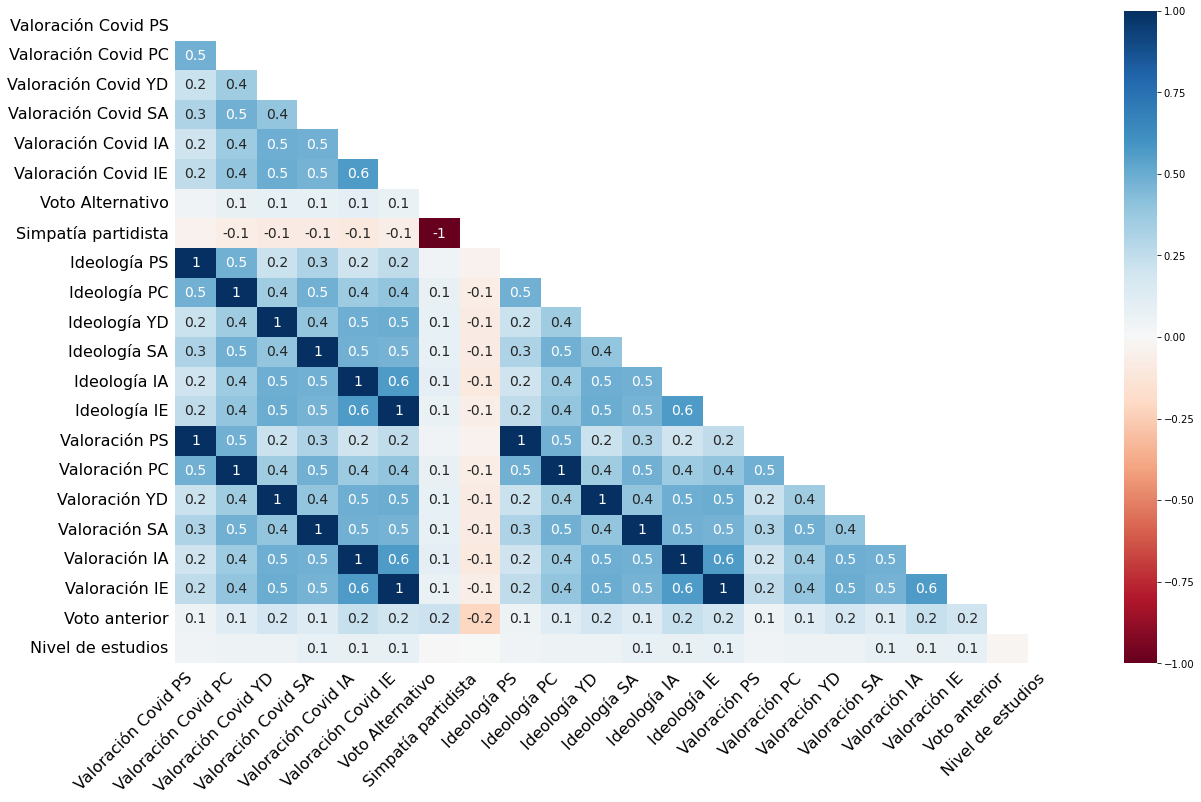

In [179]:
msno.heatmap(cis1)

### Imputación de los valores nulos en voto alternativo
Filtros de pregunta Intención de voto alternativo:
 Se pregunta voto alternativo excepto a los que han contestado en P21 (Intención de voto):
 - 77
 - 96
 - 97
 - 98
 - 99


In [180]:
#Observamos un valor nan en voto alternativo
cis1.loc[1,"Voto Alternativo"]

nan

In [181]:
#Cambiamos el tipo de variable a object ya que existían problemos con el tipo category 
cis1['Voto Alternativo']=cis1['Voto Alternativo'].astype('object')

In [182]:
#Cambiamos el tipo de variable a object ya que existían problemos con el tipo category 
cis1['Intención Voto']=cis1['Intención Voto'].astype('object')

In [183]:
#Cambiamos los nulos que aparecen en voto alternativo por los valores correspondientes en intención de voto
cis1["Voto Alternativo"].fillna(cis1["Intención Voto"], inplace = True)

In [184]:
#Ejemplo para observar que ha salido correctamente
cis1.loc[1,"Voto Alternativo"]

'No votaría'

In [185]:
# Se observa que se ha copiado bien la información
cis1.loc[1,"Intención Voto"]

'No votaría'

### Imputación de los valores nulos en simpatía partidista

Las personas que responden a SIMPATÍA las que no responden a Voto alternativo. Realizamos el mismo procedimiento que con voto alternativo.

In [186]:
#Observamos un valor nan en simpatía partidista
cis1.loc[3,"Simpatía partidista"]

nan

In [187]:
#Cambiamos el tipo de variable a object ya que existían problemos con el tipo category 
cis1['Simpatía partidista']=cis1['Simpatía partidista'].astype('object')

In [188]:
#Cambiamos los nulos que aparecen en simpatía por los valores correspondientes en intención de voto
cis1["Simpatía partidista"].fillna(cis1["Intención Voto"], inplace = True)

In [189]:
#Ejemplo para observar que ha salido correctamente
cis1.loc[3,"Simpatía partidista"]

'Podemos'

In [190]:
# Se observa que se ha copiado bien la información
cis1.loc[3,"Intención Voto"]

'Podemos'

### Imputación de nulos en la variable nivel de estudios

Los nan que aparecen en el nivel de estudios son los que han contestado en la pregunta 29 del cuestionario que no tienen 
estudios, por lo que procederemos a crear una nueva categoría llamada sin estudios.

Añadiremos la categoría "Sin estudios" para los valores nan.

In [191]:
#Observamos un valor nan en la variable nivel de estudios
cis1.loc[3775,"Nivel de estudios"]

nan

In [192]:
#Cambiamos el tipo de variable a object ya que existían problemos con el tipo category 
cis1['Nivel de estudios']=cis1['Nivel de estudios'].astype('object')

In [193]:
#Cambiamos los nulos que aparecen en nivel de estudios por la nueva categoría "Sin estudios"
cis1["Nivel de estudios"].fillna("Sin estudios", inplace = True)

In [194]:
#Se observa que se ha copiado bien la información
cis1.loc[3775,"Nivel de estudios"]

'Sin estudios'

### Imptutación Recuerdo de Voto

Los nan que se asocian a esta variable son los que contestaron las opciones 2 a la 9 en la pregunta 26, que significa que no votaron en las pasadas elecciones, por lo que crearemos la nueva categoría "No votó".

In [195]:
#Observamos un valor nan en la variable nivel de estudios
cis1.loc[3,"Voto anterior"]

nan

In [196]:
#Cambiamos el tipo de variable a object ya que existían problemos con el tipo category 
cis1['Voto anterior']=cis1['Voto anterior'].astype('object')

In [197]:
#Cambiamos los nulos que aparecen en voto anterior por la nueva categoría "No votó"
cis1["Voto anterior"].fillna("No votó", inplace = True)

In [198]:
#Se observa que se ha copiado bien la información
cis1.loc[3,"Voto anterior"]

'No votó'

### Imputación de los valores nulos en las variables Valoración Covid, Idelogía y Valoración general

Para contestar a las correspondientes variables, primero se hace una pregunta (P10 del cuestionario) a los encuestados haciendo referencia si conocen a los presidentes de cada partido. Por lo que si no los conocen, no pueden contestar a las variables de valoración e ideología. 

Los nan de estas variables son los que han contestado en la pregunta 10 que no conocen a los líderes políticos de cada partido. Se procede ac rear la nueva categoría "No lo conoce".

In [199]:
#Observamos los valores de estas 18 variables (sustituiremos cada nan que haya por la nueva categoría no lo conoce)
cis1.loc[
    :,
    [
        "Valoración Covid PS","Valoración Covid PC","Valoración Covid YD","Valoración Covid SA","Valoración Covid IA",
        "Valoración Covid IE","Ideología PS","Ideología PC","Ideología YD","Ideología SA","Ideología IA","Ideología IE",
        "Valoración PS","Valoración PC","Valoración YD","Valoración SA","Valoración IA","Valoración IE"
    ]
]

,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,Valoración Covid SA,Valoración Covid IA,Valoración Covid IE,Ideología PS,Ideología PC,Ideología YD,Ideología SA,Ideología IA,Ideología IE,Valoración PS,Valoración PC,Valoración YD,Valoración SA,Valoración IA,Valoración IE
0,N.C.,N.S.,N.S.,N.S.,6,N.S.,N.S.,N.S.,N.S.,N.S.,6,2,N.S.,N.S.,N.S.,N.S.,N.S.,N.S.
1,1 Muy mal,1 Muy mal,1 Muy mal,5,5,1 Muy mal,1 Izquierda,5,1 Izquierda,10 Derecha,5,1 Izquierda,1 Muy mal,5,1 Muy mal,7,7,1 Muy mal
2,5,2,4,1 Muy mal,2,3,5,8,5,9,6,3,4,1 Muy mal,4,1 Muy mal,3,2
3,8,4,10 Muy bien,3,5,9,1 Izquierda,10 Derecha,1 Izquierda,10 Derecha,9,1 Izquierda,10 Muy bien,1 Muy mal,10 Muy bien,1 Muy mal,2,10 Muy bien
4,3,3,3,3,5,3,4,6,2,9,2,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,4,5,3,3,2,1 Muy mal,1 Izquierda,7,1 Izquierda,10 Derecha,6,1 Izquierda,1 Muy mal,5,2,1 Muy mal,3,1 Muy mal
3773,5,5,5,1 Muy mal,NaN,1 Muy mal,5,5,5,5,NaN,5,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,NaN,1 Muy mal
3774,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,3,7,2,9,6,4,1 Muy mal,1 Muy mal,3,1 Muy mal,5,3
3775,2,4,6,1 Muy mal,NaN,5,10 Derecha,10 Derecha,1 Izquierda,N.S.,NaN,1 Izquierda,8,1 Muy mal,1 Muy mal,1 Muy mal,NaN,10 Muy bien


In [200]:
#Cambiamos el tipo de variable a object ya que existían problemos con el tipo category 
cis1[
    [
        "Valoración Covid PS","Valoración Covid PC","Valoración Covid YD","Valoración Covid SA","Valoración Covid IA",
        "Valoración Covid IE","Ideología PS","Ideología PC","Ideología YD","Ideología SA","Ideología IA","Ideología IE",
        "Valoración PS","Valoración PC","Valoración YD","Valoración SA","Valoración IA","Valoración IE"
    ]
] = cis1[
    [
        "Valoración Covid PS","Valoración Covid PC","Valoración Covid YD","Valoración Covid SA","Valoración Covid IA",
        "Valoración Covid IE","Ideología PS","Ideología PC","Ideología YD","Ideología SA","Ideología IA","Ideología IE",
        "Valoración PS","Valoración PC","Valoración YD","Valoración SA","Valoración IA","Valoración IE"
    ]
].astype('object')

In [201]:
#Cambiamos los nulos que aparecen en las variables por "No lo conoce"
cis1["Valoración Covid PS"].fillna("No lo conoce", inplace = True)
cis1["Valoración Covid PC"].fillna("No lo conoce", inplace = True)
cis1["Valoración Covid YD"].fillna("No lo conoce", inplace = True)
cis1["Valoración Covid SA"].fillna("No lo conoce", inplace = True)
cis1["Valoración Covid IA"].fillna("No lo conoce", inplace = True)
cis1["Valoración Covid IE"].fillna("No lo conoce", inplace = True)
cis1["Ideología PS"].fillna("No lo conoce", inplace = True)
cis1["Ideología PC"].fillna("No lo conoce", inplace = True)
cis1["Ideología YD"].fillna("No lo conoce", inplace = True)
cis1["Ideología SA"].fillna("No lo conoce", inplace = True)
cis1["Ideología IA"].fillna("No lo conoce", inplace = True)
cis1["Ideología IE"].fillna("No lo conoce", inplace = True)
cis1["Valoración PS"].fillna("No lo conoce", inplace = True)
cis1["Valoración PC"].fillna("No lo conoce", inplace = True)
cis1["Valoración YD"].fillna("No lo conoce", inplace = True)
cis1["Valoración SA"].fillna("No lo conoce", inplace = True)
cis1["Valoración IA"].fillna("No lo conoce", inplace = True)
cis1["Valoración IE"].fillna("No lo conoce", inplace = True)


In [202]:
#Observamos los valores de estas 18 variables (sustituiremos cada nan que haya por la nueva categoría no lo conoce)
cis1.loc[
    :,
    [
        "Valoración Covid PS","Valoración Covid PC","Valoración Covid YD","Valoración Covid SA","Valoración Covid IA",
        "Valoración Covid IE","Ideología PS","Ideología PC","Ideología YD","Ideología SA","Ideología IA","Ideología IE",
        "Valoración PS","Valoración PC","Valoración YD","Valoración SA","Valoración IA","Valoración IE"
    ]
]

,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,Valoración Covid SA,Valoración Covid IA,Valoración Covid IE,Ideología PS,Ideología PC,Ideología YD,Ideología SA,Ideología IA,Ideología IE,Valoración PS,Valoración PC,Valoración YD,Valoración SA,Valoración IA,Valoración IE
0,N.C.,N.S.,N.S.,N.S.,6,N.S.,N.S.,N.S.,N.S.,N.S.,6,2,N.S.,N.S.,N.S.,N.S.,N.S.,N.S.
1,1 Muy mal,1 Muy mal,1 Muy mal,5,5,1 Muy mal,1 Izquierda,5,1 Izquierda,10 Derecha,5,1 Izquierda,1 Muy mal,5,1 Muy mal,7,7,1 Muy mal
2,5,2,4,1 Muy mal,2,3,5,8,5,9,6,3,4,1 Muy mal,4,1 Muy mal,3,2
3,8,4,10 Muy bien,3,5,9,1 Izquierda,10 Derecha,1 Izquierda,10 Derecha,9,1 Izquierda,10 Muy bien,1 Muy mal,10 Muy bien,1 Muy mal,2,10 Muy bien
4,3,3,3,3,5,3,4,6,2,9,2,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,4,5,3,3,2,1 Muy mal,1 Izquierda,7,1 Izquierda,10 Derecha,6,1 Izquierda,1 Muy mal,5,2,1 Muy mal,3,1 Muy mal
3773,5,5,5,1 Muy mal,No lo conoce,1 Muy mal,5,5,5,5,No lo conoce,5,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,No lo conoce,1 Muy mal
3774,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,1 Muy mal,3,7,2,9,6,4,1 Muy mal,1 Muy mal,3,1 Muy mal,5,3
3775,2,4,6,1 Muy mal,No lo conoce,5,10 Derecha,10 Derecha,1 Izquierda,N.S.,No lo conoce,1 Izquierda,8,1 Muy mal,1 Muy mal,1 Muy mal,No lo conoce,10 Muy bien


### Recodificación de variables

A continuación, se recodificarán las variables para después comenzar con el análisis exploratorio de datos. El primer paso es pasar la variable edad a numérico y el resto de vairables a cualitativas.

In [203]:
#Observamos los tipos de variables
cis1.dtypes

Sexo                                   category
Edad                                   category
Comunidad Autónoma                     category
Nacionalidad                           category
Preocupación sobre el Covid            category
Vacunación Covid                       category
Cargo de la Pandemia                   category
Valoración Covid PS                      object
Valoración Covid PC                      object
Valoración Covid YD                      object
Valoración Covid SA                      object
Valoración Covid IA                      object
Valoración Covid IE                      object
Economía Nacional                      category
Economía Personal                      category
Confianza Gobierno                     category
Confianza Oposición                    category
Preferencia Presidencia                category
Intención Voto                           object
Voto Alternativo                         object
Simpatía partidista                     

In [204]:
#Código para cambiar el tipo de variable
cis1["Sexo"]=cis1['Sexo'].astype('object')
cis1["Edad"]=cis1['Edad'].astype('int')
cis1["Comunidad Autónoma"]=cis1["Comunidad Autónoma"].astype("object")
cis1["Nacionalidad"]=cis1["Nacionalidad"].astype("object")
cis1["Preocupación sobre el Covid"]=cis1["Preocupación sobre el Covid"].astype("object")
cis1["Vacunación Covid"]=cis1["Vacunación Covid"].astype("object")
cis1["Cargo de la Pandemia"]=cis1["Cargo de la Pandemia"].astype("object")
cis1["Economía Nacional"]=cis1["Economía Nacional"].astype("object")
cis1["Economía Personal"]=cis1["Economía Personal"].astype("object")
cis1["Confianza Gobierno"]=cis1["Confianza Gobierno"].astype("object")
cis1["Confianza Oposición"]=cis1["Confianza Oposición"].astype("object")
cis1["Preferencia Presidencia"]=cis1["Preferencia Presidencia"].astype("object")
cis1["Ideología personal"]=cis1["Ideología personal"].astype("object")
cis1["Participación Elecciones Anteriores"]=cis1["Participación Elecciones Anteriores"].astype("object")
cis1["Cercanía partidista"]=cis1["Cercanía partidista"].astype("object")
cis1["Religión"]=cis1["Religión"].astype("object")
cis1["Estado Civil"]=cis1["Estado Civil"].astype("object")
cis1["Situación Laboral"]=cis1["Situación Laboral"].astype("object")
cis1["Clase Social"]=cis1["Clase Social"].astype("object")
cis1["Peso"]=cis1["Peso"].astype("float")

In [205]:
#Confirmamos que las variables están en el tipo de dato que les corresponde
cis1.dtypes

Sexo                                    object
Edad                                     int64
Comunidad Autónoma                      object
Nacionalidad                            object
Preocupación sobre el Covid             object
Vacunación Covid                        object
Cargo de la Pandemia                    object
Valoración Covid PS                     object
Valoración Covid PC                     object
Valoración Covid YD                     object
Valoración Covid SA                     object
Valoración Covid IA                     object
Valoración Covid IE                     object
Economía Nacional                       object
Economía Personal                       object
Confianza Gobierno                      object
Confianza Oposición                     object
Preferencia Presidencia                 object
Intención Voto                          object
Voto Alternativo                        object
Simpatía partidista                     object
Ideología per

### Tabla variable Sexo

In [206]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [207]:
cis1["Sexo"].drop_duplicates()

0     Mujer
1    Hombre
Name: Sexo, dtype: object

In [208]:
from tabulate import tabulate
print(tabulate(cis1["Sexo"].drop_duplicates(),headers='firstrow', tablefmt='latex'))

\begin{tabular}{rllllll}
\hline
    & 0   & M   & u   & j   & e   & r   \\
\hline
  1 & H   & o   & m   & b   & r   & e   \\
\hline
\end{tabular}


|P0a: Sexo (valores iniciales)|
|-----------------------------|
|1               Hombre    |
|2               Mujer     |

### Recodificación variable Edad

Para la recodificación de la variable *edad*, utilizaremos intervalos de edades.

In [209]:
cis1.iloc[:,1]

0       79
1       56
2       65
3       72
4       38
        ..
3772    62
3773    36
3774    22
3775    36
3776    37
Name: Edad, Length: 3777, dtype: int64

In [210]:
#Forloop para codificar las edades
for i in range(len(cis1)):
    if cis1.iloc[i,1] <=24:
        cis1.iloc[i,1]=1
    elif cis1.iloc[i,1] <=34:
        cis1.iloc[i,1]=2
    elif cis1.iloc[i,1] <=44:
        cis1.iloc[i,1]=3
    elif cis1.iloc[i,1]<=54:
        cis1.iloc[i,1]=4
    elif cis1.iloc[i,1]<=64:
        cis1.iloc[i,1]=5
    else:
        cis1.iloc[i,1]=6

In [211]:
cis1.iloc[:,1]

0       6
1       5
2       6
3       6
4       3
       ..
3772    5
3773    3
3774    1
3775    3
3776    3
Name: Edad, Length: 3777, dtype: int64

In [212]:
for i in range(len(cis1)):
    if cis1.iloc[i,1] ==1:
        cis1.iloc[i,1]="Entre 18 y 24 años"
    elif cis1.iloc[i,1] ==2:
        cis1.iloc[i,1]="Entre 25 y 34 años"
    elif cis1.iloc[i,1] ==3:
        cis1.iloc[i,1]="Entre 35 y 44 años"
    elif cis1.iloc[i,1] ==4:
        cis1.iloc[i,1]="Entre 45 y 54 años"
    elif cis1.iloc[i,1] ==5:
        cis1.iloc[i,1]="Entre 55 y 64 años"
    else:
        cis1.iloc[i,1]="Mayor de 65 años"

In [213]:
cis1.iloc[:,1]

0         Mayor de 65 años
1       Entre 55 y 64 años
2         Mayor de 65 años
3         Mayor de 65 años
4       Entre 35 y 44 años
               ...        
3772    Entre 55 y 64 años
3773    Entre 35 y 44 años
3774    Entre 18 y 24 años
3775    Entre 35 y 44 años
3776    Entre 35 y 44 años
Name: Edad, Length: 3777, dtype: object

### Tabla variable Edad 

|P0b: Edad |
|-----------------------------|
|1 Entre 18 y 24 años  |
|2 Entre 25 y 34 años     |
|3 Entre 35 y 44 años|
|4 Entre 45 y 54 años|
|5 Entre 55 y 64 años|
|6 Mayor de 65 años|

### Tabla variable Comunidad Autónoma

|P0b: Comunidades Autónomas|
|-----------------------------|
|1 Andalucía  |
|2 Aragón     |
|3 Asturias (Principado de)|
|4 Baleares (Illes)|
|5 Canarias|
|6 Cantabria|
|7 Castilla-La Mancha|
|8 Castilla y León|
|9 Cataluña|
|10 Comunitat Valenciana|
|11 Extremadura|
|12 Galicia|
|13 Madrid (Comunidad de)|
|14 Murcia (Región de)|
|15 Navarra (Comunidad Floral de)|
|16 País Vasco|
|17 Rioja (La)|
|18 Ceuta (Ciudad Autónoma de)|
|19 Melilla(Ciudad Autónoma de)os|
 

### Tabla variable Nacionalidad

|P0: Nacionalidad |
|-----------------------------|
|1 Nacionalidad española  |
|2 Nacionalidad española y otra     |

### Recodificación variable Nivel de Estudios

De las 18 posibles respuestas que da el CIS, se recodificarán en un total de 4: Sin Estudios/Estudios Primarios, Estudios Secundarios/ Formación Profesional, Estudios Superiores, Otros estudios, NS/NC

In [214]:
cis1.loc[:,"Nivel de estudios"]

0                                            Sin estudios
1       Educación secundaria (ESO, EGB. Graduado Escol...
2       FP de Grado Medio (ciclo/módulo formativo de F...
3       FP de Grado Superior (ciclo/módulo formativo d...
4       FP de Grado Superior (ciclo/módulo formativo d...
                              ...                        
3772    Licenciatura (titulaciones con equivalencia of...
3773    Bachillerato (Bachillerato LOGSE, BUP, Bachill...
3774    Bachillerato (Bachillerato LOGSE, BUP, Bachill...
3775                                         Sin estudios
3776    Máster oficial universitario (especialidades m...
Name: Nivel de estudios, Length: 3777, dtype: object

In [215]:
#Valores de las columnas
cis1.iloc[:,37].drop_duplicates().tolist()

['Sin estudios',
 'Educación secundaria (ESO, EGB. Graduado Escolar. Certificad',
 'FP de Grado Medio (ciclo/módulo formativo de FP (grado medio',
 'FP de Grado Superior (ciclo/módulo formativo de FP (grado su',
 'Bachillerato (Bachillerato LOGSE, BUP, Bachillerato Superior',
 'Arquitectura/Ingeniería Técnica (aparejador/a; peritos/as)',
 'Grado (estudios de grado, enseñanzas artísticas equivalentes',
 'Doctorado',
 'Licenciatura (titulaciones con equivalencia oficial: 2º cicl',
 'Diplomatura (ATENCIÓN: sólo diplomaturas oficiales, no codif',
 'Educación Primaria (Educación Primaria de LOGSE, 5º curso de',
 'Máster oficial universitario (especialidades médicas o equiv',
 'Títulos propios de posgrado (máster no oficial, etc.)',
 'Menos de 5 años de escolarización',
 'Arquitectura/Ingeniería',
 'Otros estudios',
 'N.S./No recuerda',
 'Cualificación profesional grado inicial (FP grado inicial).']

In [216]:
#Código para recodificación variable
for i in range(len(cis1)):
    if cis1.iloc[i,37] =="Sin estudios":
        cis1.iloc[i,37]="Sin Estudios/Estudios Primarios"
    elif cis1.iloc[i,37] =="Educación Primaria (Educación Primaria de LOGSE, 5º curso de":
        cis1.iloc[i,37]="Sin Estudios/Estudios Primarios"
    elif cis1.iloc[i,37] =="Menos de 5 años de escolarización":
        cis1.iloc[i,37]="Sin Estudios/Estudios Primarios"
    elif cis1.iloc[i,37] =="Cualificación profesional grado inicial (FP grado inicial).":
        cis1.iloc[i,37]="Estudios Secundarios/Formación Profesional"
    elif cis1.iloc[i,37] =="Educación secundaria (ESO, EGB. Graduado Escolar. Certificad":
        cis1.iloc[i,37]="Estudios Secundarios/Formación Profesional"
    elif cis1.iloc[i,37] =="FP de Grado Medio (ciclo/módulo formativo de FP (grado medio":
        cis1.iloc[i,37]="Estudios Secundarios/Formación Profesional"
    elif cis1.iloc[i,37] =="Bachillerato (Bachillerato LOGSE, BUP, Bachillerato Superior":
        cis1.iloc[i,37]="Estudios Secundarios/Formación Profesional"
    elif cis1.iloc[i,37] =="FP de Grado Superior (ciclo/módulo formativo de FP (grado su":
        cis1.iloc[i,37]="Estudios Secundarios/Formación Profesional"
    elif cis1.iloc[i,37] =="FP de Grado Superior (ciclo/módulo formativo de FP (grado su":
        cis1.iloc[i,37]="Estudios Secundarios/Formación Profesional"
    elif cis1.iloc[i,37] =="Arquitectura/Ingeniería Técnica (aparejador/a; peritos/as)":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Grado (estudios de grado, enseñanzas artísticas equivalentes":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Doctorado":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Licenciatura (titulaciones con equivalencia oficial: 2º cicl":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Diplomatura (ATENCIÓN: sólo diplomaturas oficiales, no codif":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Máster oficial universitario (especialidades médicas o equiv":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Títulos propios de posgrado (máster no oficial, etc.)":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Arquitectura/Ingeniería":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="Arquitectura/Ingeniería":
        cis1.iloc[i,37]="Estudios Superiores"
    elif cis1.iloc[i,37] =="N.S./No recuerda":
        cis1.iloc[i,37]="NS/NC"
        
    
        
    
    
    
    
    
        
    

In [217]:
#Valores después del código
cis1.iloc[:,37].drop_duplicates().tolist()

['Sin Estudios/Estudios Primarios',
 'Estudios Secundarios/Formación Profesional',
 'Estudios Superiores',
 'Otros estudios',
 'NS/NC']

In [218]:
#Comprobación de que el código está bien
cis1.loc[:,"Nivel de estudios"]

0                  Sin Estudios/Estudios Primarios
1       Estudios Secundarios/Formación Profesional
2       Estudios Secundarios/Formación Profesional
3       Estudios Secundarios/Formación Profesional
4       Estudios Secundarios/Formación Profesional
                           ...                    
3772                           Estudios Superiores
3773    Estudios Secundarios/Formación Profesional
3774    Estudios Secundarios/Formación Profesional
3775               Sin Estudios/Estudios Primarios
3776                           Estudios Superiores
Name: Nivel de estudios, Length: 3777, dtype: object

### Recodificación variable Clase Social

Para esta variable, se clasificará clase media-alta, clase media-media y clase media-baja como Clase Media y clase trabajadora/obrera, clase pobre, Proletariado, a los/as de abajo, Excluidos/as, A la gente común como Clase Baja.

In [219]:
#Valores de las columnas
cis1.iloc[:,41].drop_duplicates().tolist()

['No sabe, duda',
 'Clase media-media',
 'Clase media-baja',
 'Clase media-alta',
 'Clase baja',
 'Clase trabajadora/obrera',
 'Clase pobre',
 'Clase alta',
 'N.C.',
 'Otras',
 'A la gente común',
 'No cree en las clases',
 'Proletariado',
 'Excluidos/as',
 'A los/as de abajo']

In [220]:
#Código para recodificación variable
for i in range(len(cis1)):
    if cis1.iloc[i,41] =="Clase media-media":
        cis1.iloc[i,41]="Clase media"
    elif cis1.iloc[i,41] =="Clase media-baja":
        cis1.iloc[i,41]="Clase media"
    elif cis1.iloc[i,41] =="Clase media-alta":
        cis1.iloc[i,41]="Clase media"
    elif cis1.iloc[i,41] =="Clase trabajadora/obrera":
        cis1.iloc[i,41]="Clase baja"
    elif cis1.iloc[i,41] =="Clase pobre":
        cis1.iloc[i,41]="Clase baja"
    elif cis1.iloc[i,41] =="A la gente común":
        cis1.iloc[i,41]="Clase baja"
    elif cis1.iloc[i,41] =="Proletariado":
        cis1.iloc[i,41]="Clase baja"
    elif cis1.iloc[i,41] =="Excluidos/as":
        cis1.iloc[i,41]="Clase baja"
    elif cis1.iloc[i,41] =="A los/as de abajo":
        cis1.iloc[i,41]="Clase baja"
    elif cis1.iloc[i,41] =="No sabe, duda":
        cis1.iloc[i,41]="NS/NC"
    elif cis1.iloc[i,41] =="N.C.":
        cis1.iloc[i,41]="NS/NC"

In [221]:
#Valores de las columnas despuués del código
cis1.iloc[:,41].drop_duplicates().tolist()

['NS/NC',
 'Clase media',
 'Clase baja',
 'Clase alta',
 'Otras',
 'No cree en las clases']

### Recodificación variable Cargo de la Pandemia

Al analizar esta variable, se observa que la gran mayoría de los encuestados piensa el Gobierno de España y el de las comunidades autónomas. Crearemos una categoría llamada "Otras respuestas" que incluya ademas de las personaas que han respondido "Otras respuestas", los que han respondido Organizaciones o insituciones, y ninguno. Los que han contestado "No lo sabe, duda" y N.C. crearemos la variable NS/NC.

In [222]:
#Valores de las columnas
cis1.iloc[:,6].drop_duplicates().tolist()

['Ambos en colaboración',
 'El Gobierno de las comunidades autónomas',
 'El Gobierno de España',
 'Organizaciones o instituciones (OMS, UE)',
 'Ninguno',
 '(NO LEER) No lo sabe, duda',
 'Otras respuestas',
 'Médicos/as, científicos/as y expertos/as en sanidad independ',
 'N.C.']

In [223]:
#Cuantas veces se repite cada valor
cis1.iloc[:,6].value_counts()

Ambos en colaboración                                           2531
El Gobierno de España                                            716
El Gobierno de las comunidades autónomas                         214
Médicos/as, científicos/as y expertos/as en sanidad independ     111
(NO LEER) No lo sabe, duda                                        93
Otras respuestas                                                  51
Ninguno                                                           33
Organizaciones o instituciones (OMS, UE)                          15
N.C.                                                              13
Name: Cargo de la Pandemia, dtype: int64

In [224]:
#Código para recodificación variable
for i in range(len(cis1)):
    if cis1.iloc[i,6] =="(NO LEER) No lo sabe, duda":
        cis1.iloc[i,6]="NS/NC"
    elif cis1.iloc[i,6] =="Organizaciones o instituciones (OMS, UE)":
        cis1.iloc[i,6]="Otras respuestas"
    elif cis1.iloc[i,6] =="Ninguno":
        cis1.iloc[i,6]="Otras respuestas"
    elif cis1.iloc[i,6] =="N.C.":
        cis1.iloc[i,6]="NS/NC"


In [225]:
#Valores de las columnas
cis1.iloc[:,6].drop_duplicates().tolist()

['Ambos en colaboración',
 'El Gobierno de las comunidades autónomas',
 'El Gobierno de España',
 'Otras respuestas',
 'NS/NC',
 'Médicos/as, científicos/as y expertos/as en sanidad independ']

### Recodificación variable Intención Voto

Los partidos con poca representación en el congreso se añadirán a la categoría "Otros partidos". Las categorías finales serán: PSOE, PP, VOX , Unidas Podemos(En Comú Podem, En Común-Unidas Podemos), Ciudadanos, ERC, Más País (Compromís), JXCat, EAJ-PNV, En Blanco, Otros, Abstención, NS/NC.

In [226]:
#Valores de las columnas
cis1.iloc[:,18].drop_duplicates().tolist()

['N.C.',
 'No votaría',
 'No sabe todavía',
 'Podemos',
 'En blanco',
 'PSOE',
 'PP',
 'VOX',
 'Ciudadanos',
 'Otro partido',
 'Unidas Podemos',
 'Voto nulo',
 'Más País',
 'IU',
 'PACMA',
 'Partido Feminista de España',
 'CHA',
 'Los Verdes',
 'ERC',
 'MÉS (PSM-Entesa)',
 'CC-PNC',
 'Nueva Canarias',
 'PRC',
 'EH Bildu',
 'JxCat',
 'CUP',
 'En Comú Podem',
 'BNG',
 'Compromís',
 'PDeCAT',
 'Partido Libertario',
 'EAJ-PNV',
 'Escaños en Blanco',
 'PCPE',
 'UPN',
 'Democracia Nacional',
 'PR+']

In [227]:
for i in range(len(cis1)):
    if cis1.iloc[i,18] =="N.C.":
        cis1.iloc[i,18]="NS/NC"
    elif cis1.iloc[i,18] =="No sabe todavía":
        cis1.iloc[i,18]="NS/NC"
    elif cis1.iloc[i,18] =="Compromís":
        cis1.iloc[i,18]="Más País"
    elif cis1.iloc[i,18] =="No votaría":
        cis1.iloc[i,18]="Abstención"
    elif cis1.iloc[i,18] =="Voto Nulo":
        cis1.iloc[i,18]="Abstención"
    elif cis1.iloc[i,18] =="PP":
        cis1.iloc[i,18]="PP"
    elif cis1.iloc[i,18] =="PSOE":
        cis1.iloc[i,18]="PSOE"
    elif cis1.iloc[i,18] =="VOX":
        cis1.iloc[i,18]="VOX"
    elif cis1.iloc[i,18] =="Ciudadanos":
        cis1.iloc[i,18]="Ciudadanos"
    elif cis1.iloc[i,18] =="JxCat":
        cis1.iloc[i,18]="JxCat"
    elif cis1.iloc[i,18] =="EAJ-PNV":
        cis1.iloc[i,18]="EAJ-PNV"
    elif cis1.iloc[i,18] =="Podemos":
        cis1.iloc[i,18]="Podemos"
    elif cis1.iloc[i,18] =="Podemos":
        cis1.iloc[i,18]="En Comú Podem"
    elif cis1.iloc[i,18] =="Unidas Podemos":
        cis1.iloc[i,18]="Podemos"
    elif cis1.iloc[i,18] =="IU":
        cis1.iloc[i,18]="Podemos"
    elif cis1.iloc[i,18] =="ERC":
        cis1.iloc[i,18]="ERC"
    elif cis1.iloc[i,18] =="En blanco":
        cis1.iloc[i,18]="En blanco"
    else:
        cis1.iloc[i,18]="Otros"

In [228]:
#Valores de las columnas
cis1.iloc[:,18].drop_duplicates().tolist()

['NS/NC',
 'Abstención',
 'Podemos',
 'En blanco',
 'PSOE',
 'PP',
 'VOX',
 'Ciudadanos',
 'Otros',
 'ERC',
 'JxCat',
 'Más País',
 'EAJ-PNV']

### Recodificación variable Voto Alternativo

Para la recodificación de esta variable se utiliza el mismo código que s eha ejecutado para "Intención de voto", añadiendo la categoría "No votaría a ningún otro partido".

In [229]:
#Valores de las columnas
cis1.iloc[:,19].drop_duplicates().tolist()

['N.C.',
 'No votaría',
 'No sabe todavía',
 'PSOE',
 'En blanco',
 'Más País',
 'N.S.',
 'IU',
 '(NO LEER) No votaría a ningún otro partido (cita el mismo pa',
 'Ciudadanos',
 'PP',
 'VOX',
 'Unidas Podemos',
 'Podemos',
 'Voto nulo',
 'PACMA',
 'Otro partido',
 'PCPE',
 'Los Verdes',
 'Adelante Andalucía',
 'CHA',
 'PAR',
 'FAC',
 'Partido Feminista de España',
 'CC-PNC',
 'Nueva Canarias',
 'PRC',
 'Escaños en Blanco',
 'UPL',
 'ERC',
 'CUP',
 'JxCat',
 'En Comú Podem',
 'PDeCAT',
 'Compromís',
 'Teruel Existe',
 'BNG',
 'En Marea',
 'EH Bildu',
 'UPN',
 'EAJ-PNV',
 'Falange Española de las JONS']

In [230]:
for i in range(len(cis1)):
    if cis1.iloc[i,19] =="N.C.":
        cis1.iloc[i,19]="NS/NC"
    elif cis1.iloc[i,19] =="No sabe todavía":
        cis1.iloc[i,19]="NS/NC"
    elif cis1.iloc[i,19] =="Compromís":
        cis1.iloc[i,19]="Más País"
    elif cis1.iloc[i,19] =="No votaría":
        cis1.iloc[i,19]="Abstención"
    elif cis1.iloc[i,19] =="Voto Nulo":
        cis1.iloc[i,19]="Abstención"
    elif cis1.iloc[i,19] =="PP":
        cis1.iloc[i,19]="PP"
    elif cis1.iloc[i,19] =="PSOE":
        cis1.iloc[i,19]="PSOE"
    elif cis1.iloc[i,19] =="VOX":
        cis1.iloc[i,19]="VOX"
    elif cis1.iloc[i,19] =="Ciudadanos":
        cis1.iloc[i,19]="Ciudadanos"
    elif cis1.iloc[i,19] =="JxCat":
        cis1.iloc[i,19]="JxCat"
    elif cis1.iloc[i,19] =="EAJ-PNV":
        cis1.iloc[i,19]="EAJ-PNV"
    elif cis1.iloc[i,19] =="Podemos":
        cis1.iloc[i,19]="Podemos"
    elif cis1.iloc[i,19] =="Podemos":
        cis1.iloc[i,19]="En Comú Podem"
    elif cis1.iloc[i,19] =="Unidas Podemos":
        cis1.iloc[i,19]="Podemos"
    elif cis1.iloc[i,19] =="IU":
        cis1.iloc[i,19]="Podemos"
    elif cis1.iloc[i,19] =="ERC":
        cis1.iloc[i,19]="ERC"
    elif cis1.iloc[i,19] =="En blanco":
        cis1.iloc[i,19]="En blanco"
    elif cis1.iloc[i,19] =="(NO LEER) No votaría a ningún otro partido (cita el mismo pa":
        cis1.iloc[i,19]="No votaría a ningún otro partido"
    else:
        cis1.iloc[i,19]="Otros"
    
        

In [231]:
#Valores de las columnas
cis1.iloc[:,19].drop_duplicates().tolist()

['NS/NC',
 'Abstención',
 'PSOE',
 'En blanco',
 'Otros',
 'Podemos',
 'No votaría a ningún otro partido',
 'Ciudadanos',
 'PP',
 'VOX',
 'ERC',
 'JxCat',
 'Más País',
 'EAJ-PNV']

### Recodificación variable Simpatía Partidista y Cercanía Partidista

Para ambas variables se utilizará el mismo código de recodificación que se ha empleado en la variable " Intención de voto", eliminando la categoría "En blanco".

In [232]:
#Valores de las columnas
cis1.iloc[:,36].value_counts()

PSOE                            865
Ninguno                         608
PP                              583
VOX                             274
Ciudadanos                      268
Podemos                         185
Unidas Podemos                  167
N.S.                            161
N.C.                            135
Más País                         89
Otro partido                     72
ERC                              71
IU                               59
EAJ-PNV                          37
JxCat                            34
EH Bildu                         33
PACMA                            21
En Comú Podem                    20
Compromís                        20
BNG                              16
CUP                              16
PCPE                              9
UPN                               7
Partido Libertario                4
CC-PNC                            3
Los Verdes                        3
En Común-Unidas Podemos           3
Geroa Bai                   

In [233]:
#Valores de las columnas
cis1.iloc[:,20].value_counts()           

PSOE                            913
PP                              661
Ninguno                         626
VOX                             354
Podemos                         189
Unidas Podemos                  158
Ciudadanos                      150
N.C.                            124
Otro partido                     86
N.S.                             81
ERC                              74
Más País                         71
EAJ-PNV                          44
IU                               43
PACMA                            41
JxCat                            31
EH Bildu                         29
BNG                              22
Compromís                        18
Los Verdes                       14
CC-PNC                           10
CUP                               6
En Comú Podem                     5
PRC                               4
Partido Libertario                4
PDeCAT                            2
UPN                               2
MÉS (PSM-Entesa)            

In [234]:
#Código para recodificación variable Simpatía
for i in range(len(cis1)):
    if cis1.iloc[i,20] =="N.C.":
        cis1.iloc[i,20]="NS/NC"
    elif cis1.iloc[i,20] =="N.S.":
        cis1.iloc[i,20]="NS/NC"
    elif cis1.iloc[i,20] =="Compromís":
        cis1.iloc[i,20]="Más País"
    elif cis1.iloc[i,20] =="No votaría":
        cis1.iloc[i,20]="Abstención"
    elif cis1.iloc[i,20] =="Voto Nulo":
        cis1.iloc[i,20]="Abstención"
    elif cis1.iloc[i,20] =="PP":
        cis1.iloc[i,20]="PP"
    elif cis1.iloc[i,20] =="PSOE":
        cis1.iloc[i,20]="PSOE"
    elif cis1.iloc[i,20] =="VOX":
        cis1.iloc[i,20]="VOX"
    elif cis1.iloc[i,20] =="Ciudadanos":
        cis1.iloc[i,20]="Ciudadanos"
    elif cis1.iloc[i,20] =="JxCat":
        cis1.iloc[i,20]="JxCat"
    elif cis1.iloc[i,20] =="EAJ-PNV":
        cis1.iloc[i,20]="EAJ-PNV"
    elif cis1.iloc[i,20] =="Podemos":
        cis1.iloc[i,20]="Podemos"
    elif cis1.iloc[i,20] =="Podemos":
        cis1.iloc[i,20]="En Comú Podem"
    elif cis1.iloc[i,20] =="Unidas Podemos":
        cis1.iloc[i,20]="Podemos"
    elif cis1.iloc[i,20] =="IU":
        cis1.iloc[i,20]="Podemos"
    elif cis1.iloc[i,20] =="ERC":
        cis1.iloc[i,20]="ERC"
    else:
        cis1.iloc[i,20]="Otros"

In [235]:
#Código para recodificación variable Cercanía
for i in range(len(cis1)):
    if cis1.iloc[i,36] =="N.C.":
        cis1.iloc[i,36]="NS/NC"
    elif cis1.iloc[i,36] =="N.S.":
        cis1.iloc[i,36]="NS/NC"
    elif cis1.iloc[i,36] =="Compromís":
        cis1.iloc[i,36]="Más País"
    elif cis1.iloc[i,36] =="No votaría":
        cis1.iloc[i,36]="Abstención"
    elif cis1.iloc[i,36] =="Voto Nulo":
        cis1.iloc[i,36]="Abstención"
    elif cis1.iloc[i,36] =="PP":
        cis1.iloc[i,36]="PP"
    elif cis1.iloc[i,36] =="PSOE":
        cis1.iloc[i,36]="PSOE"
    elif cis1.iloc[i,36] =="VOX":
        cis1.iloc[i,36]="VOX"
    elif cis1.iloc[i,36] =="Ciudadanos":
        cis1.iloc[i,36]="Ciudadanos"
    elif cis1.iloc[i,36] =="JxCat":
        cis1.iloc[i,36]="JxCat"
    elif cis1.iloc[i,36] =="EAJ-PNV":
        cis1.iloc[i,36]="EAJ-PNV"
    elif cis1.iloc[i,36] =="Podemos":
        cis1.iloc[i,36]="Podemos"
    elif cis1.iloc[i,36] =="Podemos":
        cis1.iloc[i,36]="En Comú Podem"
    elif cis1.iloc[i,36] =="Unidas Podemos":
        cis1.iloc[i,36]="Podemos"
    elif cis1.iloc[i,36] =="IU":
        cis1.iloc[i,36]="Podemos"
    elif cis1.iloc[i,36] =="ERC":
        cis1.iloc[i,36]="ERC"
    else:
        cis1.iloc[i,36]="Otros"

In [236]:
#Valores de las columnas
cis1.iloc[:,36].value_counts()

Otros         918
PSOE          865
PP            583
Podemos       411
NS/NC         296
VOX           274
Ciudadanos    268
ERC            71
EAJ-PNV        37
JxCat          34
Más País       20
Name: Cercanía partidista, dtype: int64

In [237]:
#Valores de las columnas
cis1.iloc[:,20].value_counts()

Otros         937
PSOE          913
PP            661
Podemos       390
VOX           354
NS/NC         205
Ciudadanos    150
ERC            74
EAJ-PNV        44
JxCat          31
Más País       18
Name: Simpatía partidista, dtype: int64

### Recodificación variables Valoración Covid y Valoración General.

Con la idea de elimiar la ordinalidad de estas variables y para simplificarlas, se decide agrupar las categorías de la siguiente forma:

    - Valoración entre 1 y 2: Muy mal
    - Valoración entre 3 y 4: Mal
    - Valoración entre 5 y 6: Regular
    - Valoración entre 7 y 8: Bien
    - Valoración entre 9 y 10: Muy bien

In [238]:
#Valores de las columnas (Ejemplo Valoración Covid PS)
cis1.iloc[:,7].drop_duplicates().tolist()

['N.C.',
 '1 Muy mal',
 '5',
 '8',
 '3',
 '4',
 '7',
 'N.S.',
 '6',
 '9',
 '2',
 '10 Muy bien',
 'No lo conoce']

In [239]:
#Valores de las columnas (Ejemplo Valoración PS)
cis1.iloc[:,28].value_counts()

1 Muy mal       1053
5                486
6                381
7                381
4                332
8                294
3                241
2                217
10 Muy bien      145
9                103
N.C.              74
N.S.              47
No lo conoce      23
Name: Valoración PS, dtype: int64

In [240]:
#Recodificación Variables Valoración Covid
cis1.iloc[:,7].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,8].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,9].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,10].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,11].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,12].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)


In [241]:
#Recodificación variables Valoración (Pendiente)
cis1.iloc[:,28].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,29].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,30].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,31].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,32].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)
cis1.iloc[:,33].replace({"1 Muy mal":"Muy Mal", "2":"Muy Mal", "3":"Mal", "4":"Mal", "5":"Regular", "6":"Regular", "7":"Bien", "8":"Bien" ,"9":"Muy Bien", "10 Muy bien":"Muy Bien" ,"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)


In [242]:
cis1.iloc[:,[28,29,30,31,32,33]]

,Valoración PS,Valoración PC,Valoración YD,Valoración SA,Valoración IA,Valoración IE
0,NS/NC,NS/NC,NS/NC,NS/NC,NS/NC,NS/NC
1,Muy Mal,Regular,Muy Mal,Bien,Bien,Muy Mal
2,Mal,Muy Mal,Mal,Muy Mal,Mal,Muy Mal
3,Muy Bien,Muy Mal,Muy Bien,Muy Mal,Muy Mal,Muy Bien
4,Mal,Mal,Mal,Mal,Mal,Mal
...,...,...,...,...,...,...
3772,Muy Mal,Regular,Muy Mal,Muy Mal,Mal,Muy Mal
3773,Muy Mal,Muy Mal,Muy Mal,Muy Mal,No lo conoce,Muy Mal
3774,Muy Mal,Muy Mal,Mal,Muy Mal,Regular,Mal
3775,Bien,Muy Mal,Muy Mal,Muy Mal,No lo conoce,Muy Bien


 ### Recodificación variable Participación Elecciones Anteriores

Se agruparán las categorías de la siguiente forma para la simplificación de la variable:

    - Fue a votar y votó/ Votó por correo: Votó
    - Fue a votar pero no pudo hacerlo/ No fue a votar porque no pudo/ Prefirió no votar : No votó
    - No tenía edad para votar/ No tenía derecho a voto: No tenía derecho a voto
    - NC/ No recuerda/NS: NS/NC

In [243]:
#Valores de las columnas 
cis1.iloc[:,34].value_counts()

Fue a votar y votó                  3023
Prefirió no votar/Me abstuve         299
Votó por correo                      173
No fue a votar porque no pudo        116
No tenía edad para votar              88
No recuerda                           47
Fue a votar pero no pudo hacerlo      13
No tenía derecho a voto               11
N.C.                                   7
Name: Participación Elecciones Anteriores, dtype: int64

In [244]:
#Recodificación variables Valoración
cis1.iloc[:,34].replace({"Fue a votar y votó":"Votó", "Votó por correo":"Votó", "Prefirió no votar/Me abstuve":"No votó", "No fue a votar porque no pudo":"No votó", "Fue a votar pero no pudo hacerlo":"No votó", "No tenía edad para votar":"No tenía derecho a voto", "No recuerda":"NS/NC", "N.C.":"NS/NC"}, inplace = True)

In [245]:
#Valores de las columnas 
cis1.iloc[:,34].value_counts()

Votó                       3196
No votó                     428
No tenía derecho a voto      99
NS/NC                        54
Name: Participación Elecciones Anteriores, dtype: int64

### Recodificación variable Voto Anterior

En la variable "Voto Anterior" se utilizará un código similar al utilizado en "Intención de voto" a diferencia de que habrá una nueva categoría llamada "No votó" que hace referencia a los NAs que se han imputado con anterioridad.

In [246]:
#Valores de las columnas 
cis1.iloc[:,35].value_counts()

PSOE                       910
No votó                    581
PP                         530
Unidas Podemos             331
N.C.                       326
Ciudadanos                 228
VOX                        215
No recuerda                140
En blanco                  100
ERC                         81
EAJ-PNV                     41
Voto nulo                   37
En Comú Podem               36
Más País                    30
Otros partidos              29
JxCat                       28
EH Bildu                    27
PACMA                       19
En Común-Unidas Podemos     18
Més Compromís               18
BNG                         16
Na+                         11
CCa-NC                       9
PRC                          8
CUP                          8
Name: Voto anterior, dtype: int64

In [247]:
#Código para recodificación variable
for i in range(len(cis1)):
    if cis1.iloc[i,35] =="N.C.":
        cis1.iloc[i,35]="NS/NC"
    elif cis1.iloc[i,35] =="No recuerda":
        cis1.iloc[i,35]="NS/NC"
    elif cis1.iloc[i,35] =="Més Compromís":
        cis1.iloc[i,35]="Más País"
    elif cis1.iloc[i,35] =="Voto nulo":
        cis1.iloc[i,35]="Abstención"
    elif cis1.iloc[i,35] =="PP":
        cis1.iloc[i,35]="PP"
    elif cis1.iloc[i,35] =="PSOE":
        cis1.iloc[i,35]="PSOE"
    elif cis1.iloc[i,35] =="VOX":
        cis1.iloc[i,35]="VOX"
    elif cis1.iloc[i,35] =="Ciudadanos":
        cis1.iloc[i,35]="Ciudadanos"
    elif cis1.iloc[i,35] =="JxCat":
        cis1.iloc[i,35]="JxCat"
    elif cis1.iloc[i,35] =="EAJ-PNV":
        cis1.iloc[i,35]="EAJ-PNV"
    elif cis1.iloc[i,35] =="Podemos":
        cis1.iloc[i,35]="Podemos"
    elif cis1.iloc[i,35] =="Podemos":
        cis1.iloc[i,35]="En Comú Podem"
    elif cis1.iloc[i,35] =="Unidas Podemos":
        cis1.iloc[i,35]="Podemos"
    elif cis1.iloc[i,35] =="IU":
        cis1.iloc[i,35]="Podemos"
    elif cis1.iloc[i,35] =="ERC":
        cis1.iloc[i,35]="ERC"
    elif cis1.iloc[i,35] =="En blanco":
        cis1.iloc[i,35]="En blanco"
    elif cis1.iloc[i,35] =="No votó":
        cis1.iloc[i,35]="No votó"
    else:
        cis1.iloc[i,35]="Otros"
    

In [248]:
#Valores de las columnas 
cis1.iloc[:,35].value_counts()

PSOE          910
No votó       581
PP            530
NS/NC         466
Podemos       331
Ciudadanos    228
VOX           215
Otros         211
En blanco     100
ERC            81
EAJ-PNV        41
Abstención     37
JxCat          28
Más País       18
Name: Voto anterior, dtype: int64

### Recodificación variable Religión

Se agruparán los "Católico/a no practicante" y los "Católico/a practicante" en "Católicos" y los "Indiferente, no creyente" y los "Agnóstico/a (no niegan la existencia de Dios pero tampoco la" en "No creyente" para la simplificación de la variable.

In [249]:
#Valores de las columnas 
cis1.iloc[:,38].value_counts()

Católico/a no practicante                                       1479
Católico/a practicante                                           722
Ateo/a (niegan la existencia de Dios)                            512
Indiferente, no creyente                                         489
Agnóstico/a (no niegan la existencia de Dios pero tampoco la     401
Creyente de otra religión                                        105
N.C.                                                              69
Name: Religión, dtype: int64

In [250]:
cis1.iloc[:,38].replace(
    {
        "Católico/a practicante":"Católico",
        "Católico/a no practicante":"Católico",
        "Agnóstico/a (no niegan la existencia de Dios pero tampoco la":"No creyente",
        "Indiferente, no creyente":"No creyente", 
        "N.C.":"NS/NC"
    },
    inplace = True
)

In [251]:
#Valores de las columnas 
cis1.iloc[:,38].value_counts()

Católico                                 2201
No creyente                               890
Ateo/a (niegan la existencia de Dios)     512
Creyente de otra religión                 105
NS/NC                                      69
Name: Religión, dtype: int64

### Recodificación variable Estado Civil

A la hora de la recodificación de esta variable se agruparán las categorías "Soltero/a", "Divorciado/a" y "Separado/a" en una sola llamada "Soltero/a"

In [252]:
#Valores de las columnas 
cis1.iloc[:,39].value_counts()

Casado/a        1938
Soltero/a       1165
Divorciado/a     295
Viudo/a          276
Separado/a        91
N.C.              12
Name: Estado Civil, dtype: int64

In [253]:
cis1.iloc[:,39].replace({"Divorciado/a":"Soltero/a","Separado/a":"Soltero/a", "N.C.":"NS/NC"}, inplace = True)

In [254]:
#Valores de las columnas 
cis1.iloc[:,39].value_counts()

Casado/a     1938
Soltero/a    1551
Viudo/a       276
NS/NC          12
Name: Estado Civil, dtype: int64

### Recodificación Situación Laboral

In [255]:
#Valores de las columnas 
cis1.iloc[:,40].value_counts()

Trabaja                                                  2107
Jubilado/a o pensionista (anteriormente ha trabajado)     884
En paro y ha trabajado antes                              338
Estudiante                                                170
Trabajo doméstico no remunerado                           152
Pensionista (anteriormente no ha trabajado)                81
Otra situación                                             28
En paro y busca su primer empleo                           14
N.C.                                                        3
Name: Situación Laboral, dtype: int64

In [256]:
cis1.iloc[:,40].replace(
    {
        "Jubilado/a o pensionista (anteriormente ha trabajado)":"Jubilados o pensionistas",
        "Pensionista (anteriormente no ha trabajado)":"Jubilados o pensionistas","En paro y ha trabajado antes":"Parados",
        "En paro y busca su primer empleo":"Parados","N.C.":"NS/NC"
    },
    inplace = True
)

In [257]:
#Valores de las columnas 
cis1.iloc[:,40].value_counts()

Trabaja                            2107
Jubilados o pensionistas            965
Parados                             352
Estudiante                          170
Trabajo doméstico no remunerado     152
Otra situación                       28
NS/NC                                 3
Name: Situación Laboral, dtype: int64

### Recodificación resto de variables

Las variables que quedan por recodificar simplemente se les va a cambiar los valores que tengan "N.S." o "N.C." por "NS/NC" con la función replace.

In [258]:
cis1.replace({"N.S.":"NS/NC","N.C.":"NS/NC"}, inplace = True)

In [259]:
cis1

,Sexo,Edad,Comunidad Autónoma,Nacionalidad,Preocupación sobre el Covid,Vacunación Covid,Cargo de la Pandemia,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,...,Valoración IE,Participación Elecciones Anteriores,Voto anterior,Cercanía partidista,Nivel de estudios,Religión,Estado Civil,Situación Laboral,Clase Social,Peso
0,Mujer,Mayor de 65 años,Andalucía,La nacionalidad española,Nada,"Sí, ya me he vacunado",Ambos en colaboración,NS/NC,NS/NC,NS/NC,...,NS/NC,Votó,NS/NC,NS/NC,Sin Estudios/Estudios Primarios,Católico,Soltero/a,Jubilados o pensionistas,NS/NC,1.19919
1,Hombre,Entre 55 y 64 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de las comunidades autónomas,Muy Mal,Muy Mal,Muy Mal,...,Muy Mal,No votó,No votó,Otros,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,NS/NC,0.90517
2,Hombre,Mayor de 65 años,Andalucía,La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Muy Mal,Mal,...,Muy Mal,Votó,PSOE,PSOE,Estudios Secundarios/Formación Profesional,Católico,Casado/a,Jubilados o pensionistas,Clase media,1.01846
3,Hombre,Mayor de 65 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Bien,Mal,Muy Bien,...,Muy Bien,NS/NC,No votó,Podemos,Estudios Secundarios/Formación Profesional,Católico,Viudo/a,Jubilados o pensionistas,Clase media,1.01846
4,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Poco,"Sí, ya me he vacunado",Ambos en colaboración,Mal,Mal,Mal,...,Mal,Votó,Ciudadanos,Ciudadanos,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,Clase media,0.99364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Hombre,Entre 55 y 64 años,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,Mal,Regular,Mal,...,Muy Mal,Votó,PP,PP,Estudios Superiores,Católico,Casado/a,Trabaja,Clase media,1.02325
3773,Mujer,Entre 35 y 44 años,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Regular,Regular,...,Muy Mal,Votó,PSOE,PSOE,Estudios Secundarios/Formación Profesional,Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase baja,1.27501
3774,Hombre,Entre 18 y 24 años,Melilla (Ciudad Autónoma de),La nacionalidad española,(NO LEER) Regular,"Sí, ya me he vacunado","Médicos/as, científicos/as y expertos/as en sa...",Muy Mal,Muy Mal,Muy Mal,...,Mal,No votó,No votó,Ciudadanos,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Parados,Otras,1.26036
3775,Hombre,Entre 35 y 44 años,Melilla (Ciudad Autónoma de),La nacionalidad española y otra,Mucho,"Sí, ya me he vacunado",Otras respuestas,Muy Mal,Mal,Regular,...,Muy Bien,No tenía derecho a voto,No votó,PSOE,Sin Estudios/Estudios Primarios,Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase media,1.12326


### Análisis Exploratorio de Datos

In [260]:
lista=["No lo conoce","NS/NC","1 Izquierda","2","3","4","5","6","7","8","9","10 Derecha"]

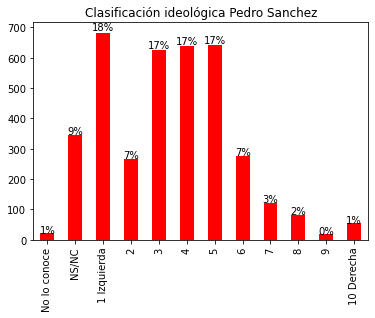

In [261]:
ax=cis1["Ideología PS"].value_counts().reindex(lista).plot(kind="bar",title= "Clasificación ideológica Pedro Sanchez",color = "r")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

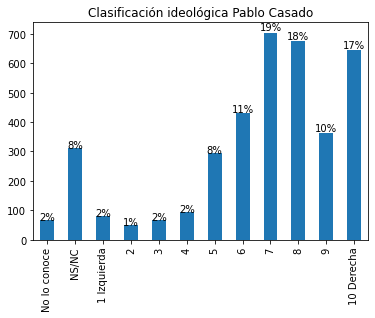

In [262]:
ax=cis1["Ideología PC"].value_counts().reindex(lista).plot(kind="bar",title= "Clasificación ideológica Pablo Casado")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

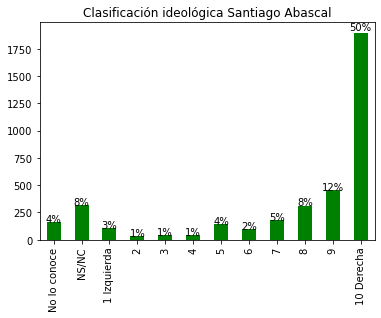

In [263]:
ax=cis1["Ideología SA"].value_counts().reindex(lista).plot(kind="bar",title= "Clasificación ideológica Santiago Abascal",color = "g")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

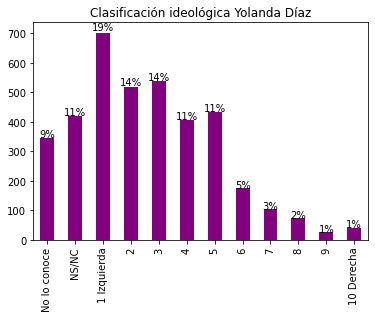

In [264]:
ax=cis1["Ideología YD"].value_counts().reindex(lista).plot(kind="bar",title= "Clasificación ideológica Yolanda Díaz",color = "purple")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

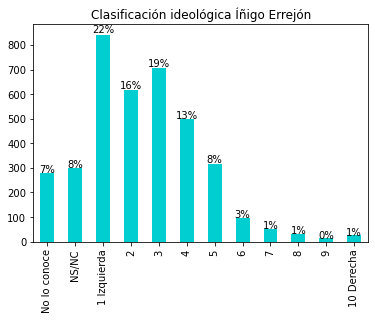

In [265]:
ax=cis1["Ideología IE"].value_counts().reindex(lista).plot(kind="bar",title= "Clasificación ideológica Íñigo Errejón",color = "darkturquoise")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

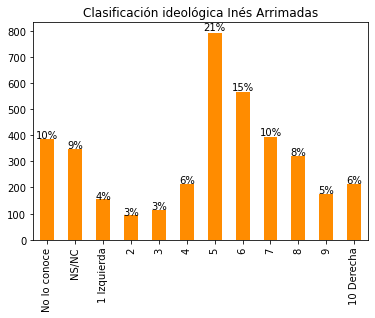

In [266]:
ax=cis1["Ideología IA"].value_counts().reindex(lista).plot(kind="bar",title= "Clasificación ideológica Inés Arrimadas",color = "darkorange")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

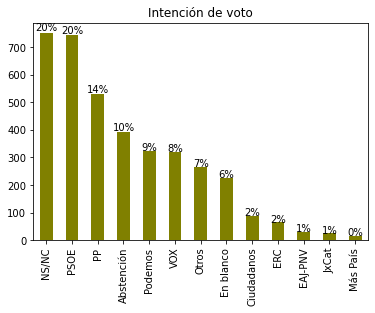

In [267]:
ax=cis1["Intención Voto"].value_counts().plot(kind="bar",title= "Intención de voto",color = "olive")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height/len(cis1):.0%}', (x + width/2, y + height*1.01), ha='center')

In [268]:
#total_vot = int_NE.sum(1).to_dict()
#name_pp = int_NE.index.to_list()

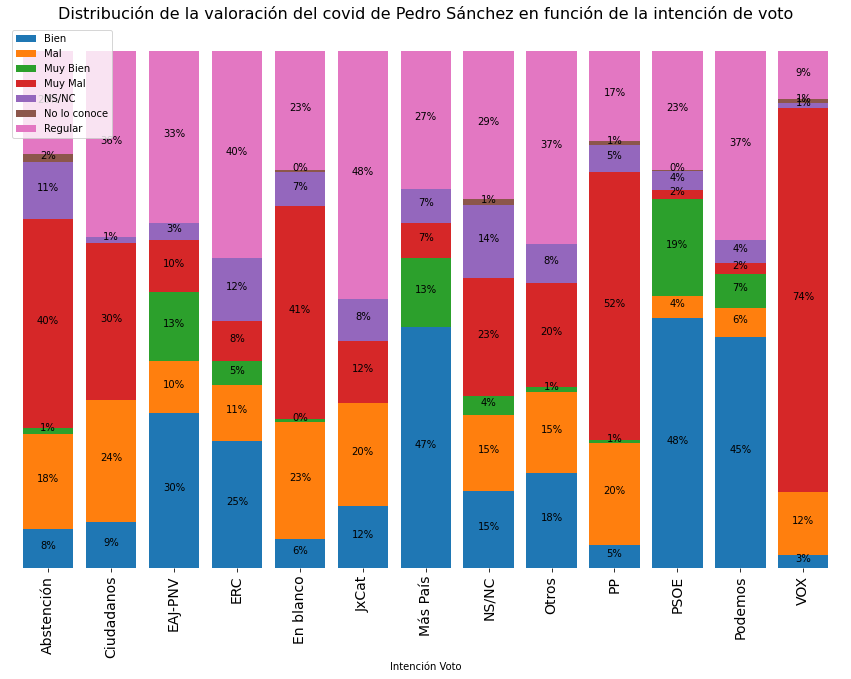

In [269]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Valoración Covid PS"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Valoración Covid PS", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de la valoración del covid de Pedro Sánchez en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

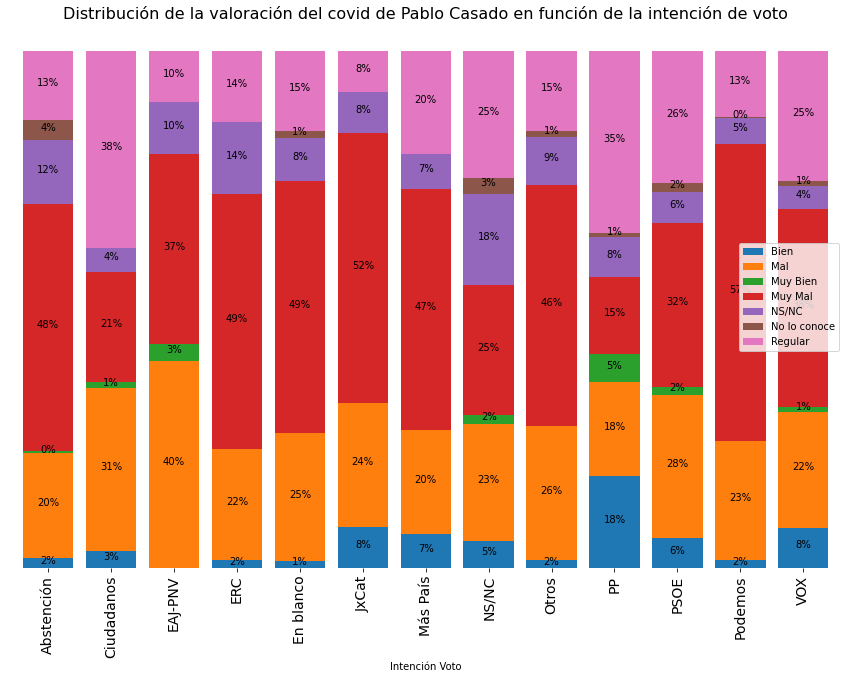

In [270]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Valoración Covid PC"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Valoración Covid PC", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de la valoración del covid de Pablo Casado en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

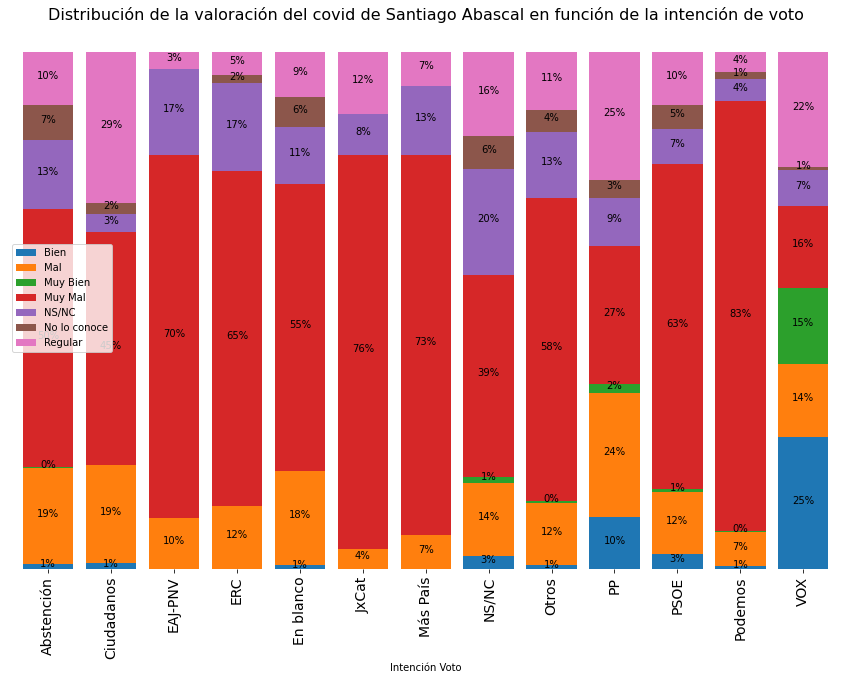

In [271]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Valoración Covid SA"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Valoración Covid SA", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de la valoración del covid de Santiago Abascal en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

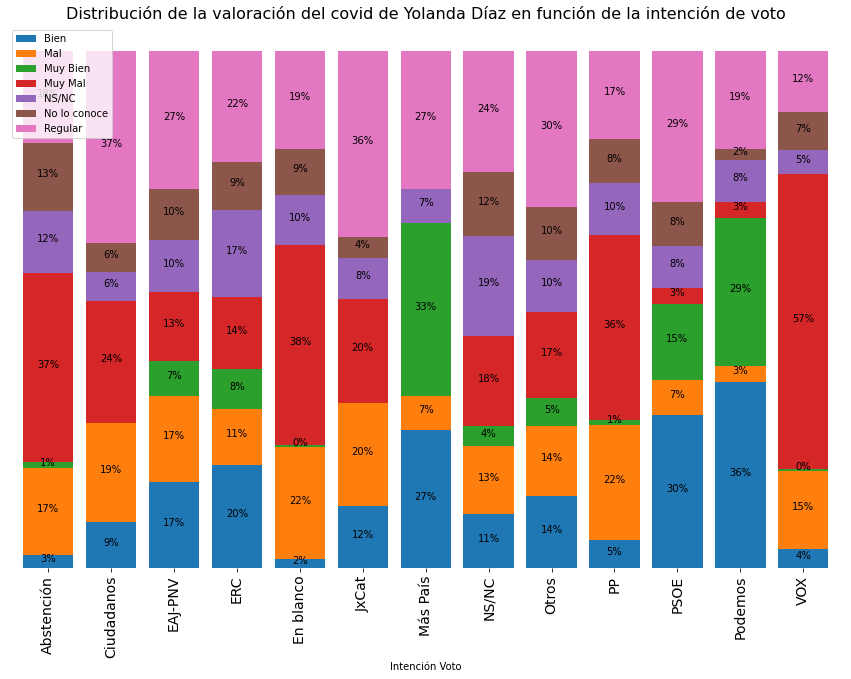

In [272]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Valoración Covid YD"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Valoración Covid YD", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de la valoración del covid de Yolanda Díaz en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

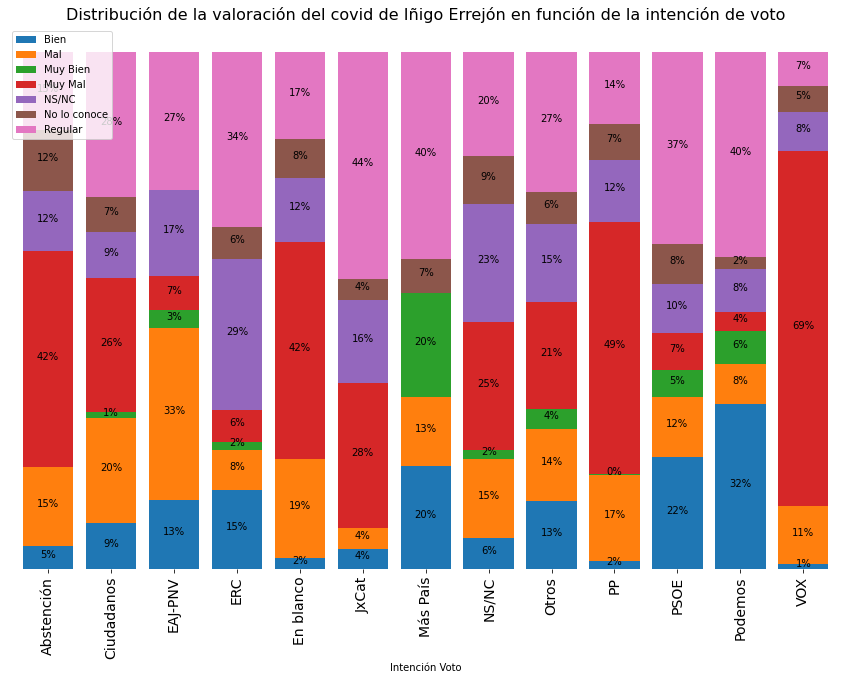

In [273]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Valoración Covid IE"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Valoración Covid IE", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de la valoración del covid de Iñigo Errejón en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

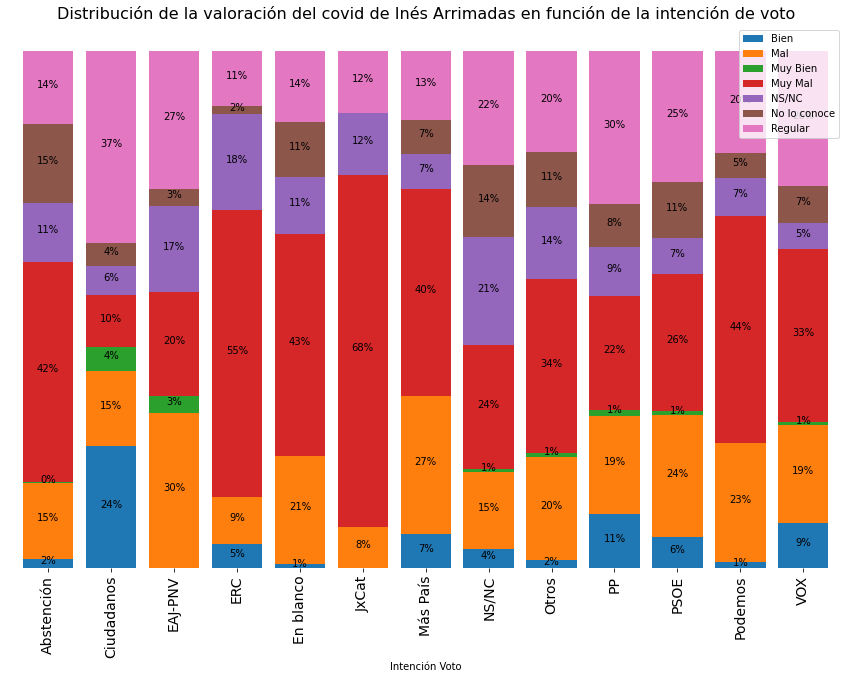

In [274]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Valoración Covid IA"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Valoración Covid IA", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de la valoración del covid de Inés Arrimadas en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

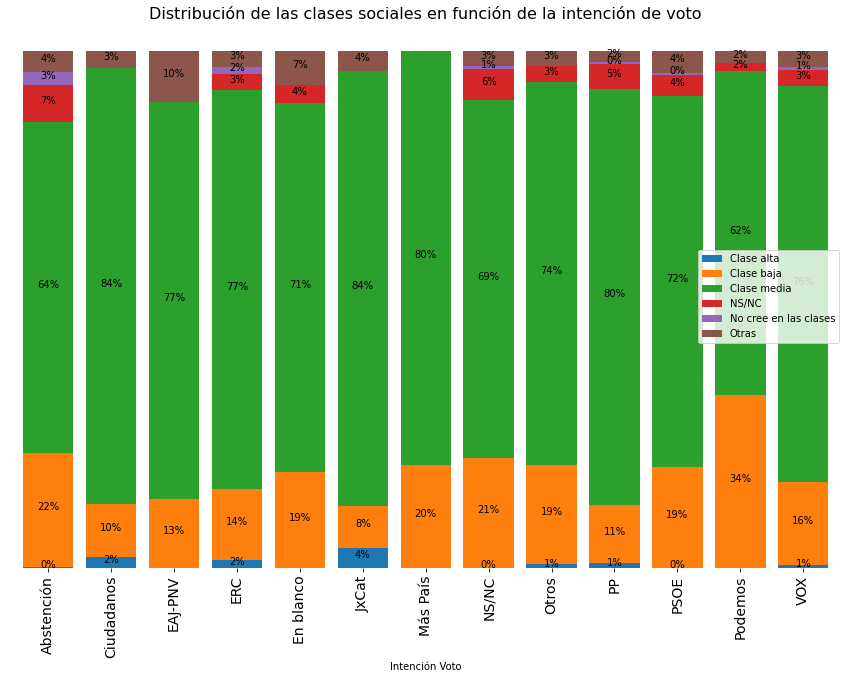

In [275]:
# Cómo ha votado la gente  de diferentes clases sociales
#int_VC= cis1.groupby(["Intención Voto","Clase Social"]).size()
#int_VC = int_VC.reset_index()
#int_VC = pd.pivot_table(int_VC,columns = "Clase Social", index = "Intención Voto", values = 0)
#int_VC.plot(kind="bar", stacked = True,figsize=(15, 10))
#for p in ax.patches:
#    width = p.get_width()
#    height = p.get_height()
#    x, y = p.get_xy() 
#    if (i%13==0) and (i!=0):
#        n = 0
#    total = total_vot[name_pp[n]]
#    ax.annotate(f'{round(height/total*100)}%', (x + width/2, y + height/2), ha='center')
#    i+=1
#    n+=1
    
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Clase Social"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Clase Social", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de las clases sociales en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

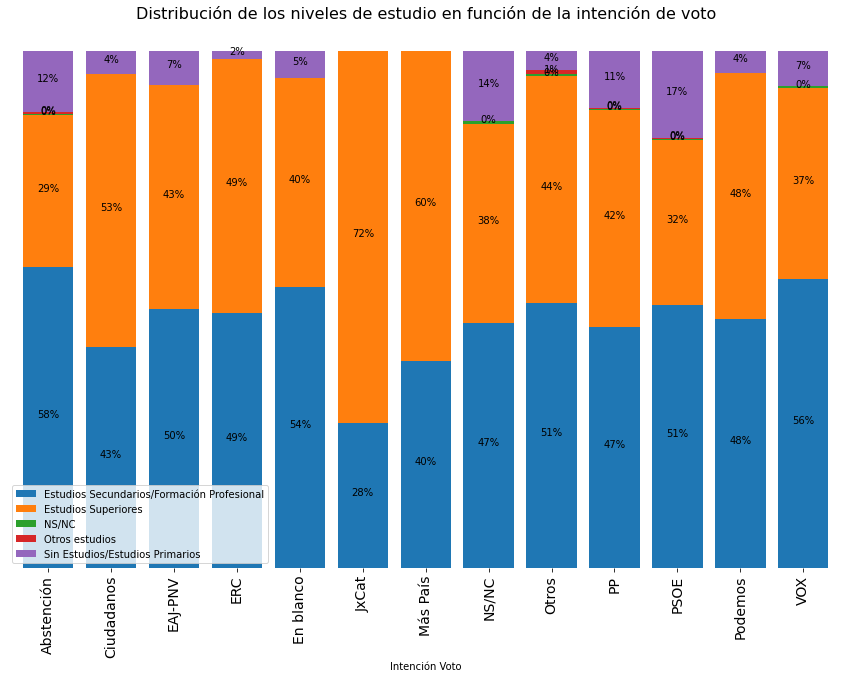

In [276]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Nivel de estudios"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Nivel de estudios", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de los niveles de estudio en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

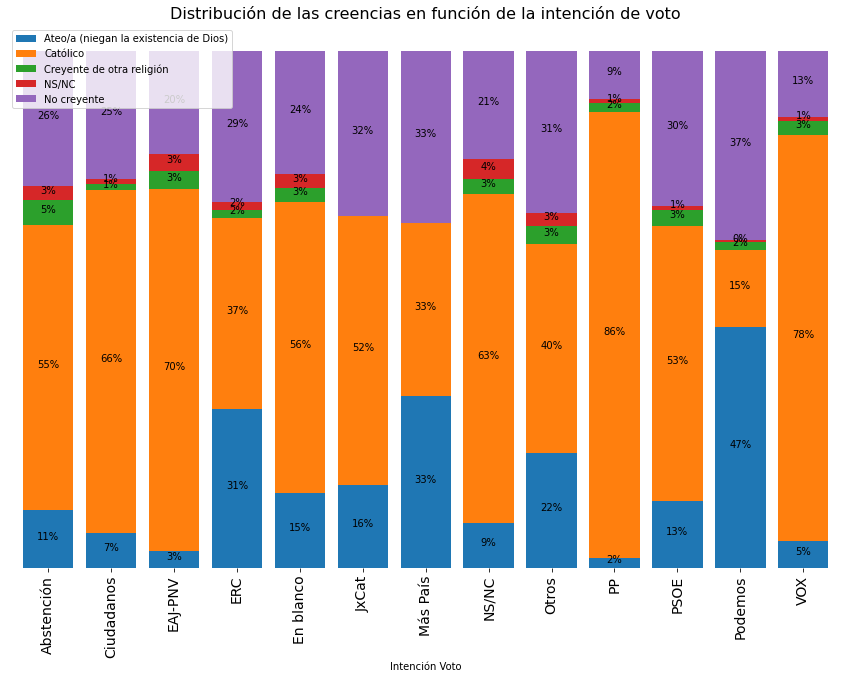

In [277]:
# Normalize result
int_NE= cis1.groupby(["Intención Voto","Religión"]).size()
int_NE = int_NE.reset_index()
int_NE = pd.pivot_table(int_NE,columns = "Religión", index = "Intención Voto", values = 0)
int_NE_pct = int_NE.div(int_NE.sum(1), axis=0)
ax = int_NE_pct.plot(kind='bar',stacked = True,figsize=(15,10),width = 0.8,edgecolor=None)
plt.legend(labels=int_NE.columns,fontsize= 10)
plt.title("Distribución de las creencias en función de la intención de voto",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height>0:
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

### Porcentaje Intención Voto y Elecciones Anteriores

In [278]:
cis_copy_tasa = cis1.copy()
#Renombramos las columnas
cis_copy_tasa.columns= [
    "Sexo", "Edad", "Comunidad Autónoma", "Nacionalidad", "Preocupación sobre el Covid","Vacunación Covid",
    "Cargo de la Pandemia","Valoración Covid PS","Valoración Covid PC","Valoración Covid YD","Valoración Covid SA",
    "Valoración Covid IA","Valoración Covid IE","Economía Nacional","Economía Personal","Confianza Gobierno",
    "Confianza Oposición","Preferencia Presidencia","InVoto","Voto Alternativo","Simpatía partidista",
    "Ideología personal","Ideología PS","Ideología PC","Ideología YD","Ideología SA","Ideología IA","Ideología IE",
    "Valoración PS","Valoración PC","Valoración YD","Valoración SA","Valoración IA","Valoración IE",
    "Participación Elecciones Anteriores","Vant","Cercanía partidista","Nivel de estudios","Religión",
    "Estado Civil","Situación Laboral","Clase Social","Peso"
]
cis_copy_tasa["Vant"].value_counts(normalize= True)

PSOE          0.240932
No votó       0.153826
PP            0.140323
NS/NC         0.123378
Podemos       0.087636
Ciudadanos    0.060365
VOX           0.056923
Otros         0.055864
En blanco     0.026476
ERC           0.021446
EAJ-PNV       0.010855
Abstención    0.009796
JxCat         0.007413
Más País      0.004766
Name: Vant, dtype: float64

In [279]:
cis_copy_tasa = cis_copy_tasa.drop(cis_copy_tasa[cis_copy_tasa['InVoto']=="Abstención"].index)
cis_copy_tasa["InVoto"].value_counts(normalize= True)

NS/NC         0.222288
PSOE          0.219923
PP            0.157257
Podemos       0.095182
VOX           0.093999
Otros         0.078333
En blanco     0.066805
Ciudadanos    0.026308
ERC           0.019214
EAJ-PNV       0.008868
JxCat         0.007390
Más País      0.004434
Name: InVoto, dtype: float64

### Tasa fidelidad PSOE

In [280]:
cis_psoe_ant=cis_copy_tasa[cis_copy_tasa.Vant== "PSOE"].index.tolist()

In [281]:
cis_psoe_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "PSOE"].index.tolist()

In [282]:
count = 0
for i in cis_psoe_ant:
    for j in cis_psoe_actual:
        if(i==j):
            count += 1
            break
count

597

In [283]:
Tasa_fid_psoe = 597/871
round(Tasa_fid_psoe,4)

0.6854

### Tasa fidelidad PP

In [284]:
cis_pp_ant=cis_copy_tasa[cis_copy_tasa.Vant== "PP"].index.tolist()

In [285]:
cis_pp_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "PP"].index.tolist()

In [286]:
count = 0
for i in cis_pp_ant:
    for j in cis_pp_actual:
         if(i==j):
            count += 1
            break
count

335

In [287]:
Tasa_fid_pp = 335/502
round(Tasa_fid_pp,4)


0.6673

### Tasa fidelidad VOX

In [288]:
cis_vox_ant=cis_copy_tasa[cis_copy_tasa.Vant== "VOX"].index.tolist()

In [289]:
cis_vox_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "VOX"].index.tolist()

In [290]:
count = 0
for i in cis_vox_ant:
    for j in cis_vox_actual:
        if(i==j):
            count += 1
            break
count

163

In [291]:
Tasa_fid_vox = 163/208
round(Tasa_fid_vox,4)

0.7837

### Tasa Fidelidad Podemos

In [292]:
cis_pod_ant=cis_copy_tasa[cis_copy_tasa.Vant== "Podemos"].index.tolist()

In [293]:
cis_pod_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "Podemos"].index.tolist()

In [294]:
count = 0
for i in cis_pod_ant:
    for j in cis_pod_actual:
        if(i==j):
            count += 1
            break
count

207

In [295]:
Tasa_fid_pod = 207/310
round(Tasa_fid_pod,4)

0.6677

### Tasa fidelidad Más País

In [296]:
cis_mp_ant=cis_copy_tasa[cis_copy_tasa.Vant== "Más País"].index.tolist()

In [297]:
cis_mp_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "Más País"].index.tolist()

In [298]:
count = 0
for i in cis_mp_ant:
    for j in cis_pod_actual:
        if(i==j):
            count += 1
            break
count

3

In [299]:
Tasa_fid_mp = count/len(cis_mp_ant)
round(Tasa_fid_mp,4)

0.1667

### Tasa fidelidad Ciudadanos

In [300]:
cis_cd_ant=cis_copy_tasa[cis_copy_tasa.Vant== "Ciudadanos"].index.tolist()

In [301]:
cis_cd_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "Ciudadanos"].index.tolist()

In [302]:
count = 0
for i in cis_cd_ant:
    for j in cis_cd_actual:
        if(i==j):
            count += 1
            break
count

53

In [303]:
Tasa_fid_cd = count/len(cis_cd_ant)
round(Tasa_fid_cd,4)

0.2624

### Tasa fidelidad ERC

In [304]:
cis_erc_ant=cis_copy_tasa[cis_copy_tasa.Vant== "ERC"].index.tolist()

In [305]:
cis_erc_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "ERC"].index.tolist()

In [306]:
count = 0
for i in cis_erc_ant:
    for j in cis_erc_actual:
        if(i==j):
            count += 1
            break
count

55

In [307]:
Tasa_fid_erc = count/len(cis_erc_ant)
round(Tasa_fid_erc,4)

0.7051

### Tasa fidelidad JXCAT

In [308]:
cis_jxc_ant=cis_copy_tasa[cis_copy_tasa.Vant== "JxCat"].index.tolist()

In [309]:
cis_jxc_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "JxCat"].index.tolist()

In [310]:
count = 0
for i in cis_jxc_ant:
    for j in cis_jxc_actual:
        if(i==j):
            count += 1
            break
count

21

In [311]:
Tasa_fid_jxc = count/len(cis_jxc_ant)
round(Tasa_fid_jxc,4)

0.7778

### Tasa Fidelidad PNV

In [312]:
cis_pnv_ant=cis_copy_tasa[cis_copy_tasa.Vant== "EAJ-PNV"].index.tolist()

In [313]:
cis_pnv_actual=cis_copy_tasa[cis_copy_tasa.InVoto== "EAJ-PNV"].index.tolist()

In [314]:
count = 0
for i in cis_pnv_ant:
    for j in cis_pnv_actual:
        if(i==j):
            count += 1
            break
count

26

In [315]:
Tasa_fid_pnv = count/len(cis_pnv_ant)
round(Tasa_fid_pnv,4)

0.6667

### Partición de la muestra y Random Forest Multioutput Secuencial

El primer paso será ordenar las variables que tengan menos NS/NC a más NS/NC

In [316]:
# Ordenación de variables según "NS/NC"
copy_cis1=cis1.copy()
copy_cis1=copy_cis1[copy_cis1 == "NS/NC"]
copy_cis1.fillna(0, inplace = True)
copy_cis1.replace({"NS/NC":1}, inplace = True)
copy_cis1.sum().sort_values()

Sexo                                     0.0
Nacionalidad                             0.0
Peso                                     0.0
Edad                                     0.0
Comunidad Autónoma                       0.0
Situación Laboral                        3.0
Nivel de estudios                        8.0
Vacunación Covid                        12.0
Estado Civil                            12.0
Preocupación sobre el Covid             30.0
Economía Personal                       46.0
Participación Elecciones Anteriores     54.0
Economía Nacional                       61.0
Religión                                69.0
Cargo de la Pandemia                   106.0
Valoración PS                          121.0
Confianza Oposición                    122.0
Confianza Gobierno                     122.0
Valoración PC                          139.0
Valoración IE                          148.0
Valoración IA                          159.0
Clase Social                           161.0
Valoración

In [317]:
#"Sexo","Nacionalidad","Peso","Edad","Comunidad Autónoma","Situación Laboral","Nivel de estudios","Vacunación Covid","Estado Civil","Preocupación sobre el Covid","Economía Personal","Participación Elecciones Anteriores","Economía Nacional","Religión","Cargo de la Pandemia","Valoración PS","Confianza Oposición","Confianza Gobierno","Valoración PC","Valoración IE","Valoración IA","Clase Social","Valoración SA","Valoración YD","Simpatía partidista","Preferencia Presidencia","Valoración Covid PS","Cercanía partidista","Ideología IE","Ideología PC","Ideología personal","Ideología SA","Ideología PS","Ideología IA","Valoración Covid PC","Valoración Covid YD","Ideología YD","Valoración Covid SA","Valoración Covid IA","Voto anterior","Valoración Covid IE","Intención Voto","Voto Alternativo"                   

In [318]:
#Personas han respondido a Intención de Voto (IV):
RIV=cis1.loc[:,"Intención Voto"]!="NS/NC"
##Personas que no han respondido a Intención de Voto (IV):
NRIV=cis1.loc[:,"Intención Voto"]=="NS/NC"
#dim(N_IV)[1]
print(RIV.value_counts())
print(NRIV.value_counts())
#Responden a Intención de voto =3025
#No responden a intención de voto = 752

True     3025
False     752
Name: Intención Voto, dtype: int64
False    3025
True      752
Name: Intención Voto, dtype: int64


In [319]:
#Matriz sin NS/NC en intención de voto
in_NSNC = cis1.loc[:,"Intención Voto"]!="NS/NC"
cis2 = cis1[in_NSNC]
print(cis2["Intención Voto"].value_counts())
cis2

PSOE          744
PP            532
Abstención    394
Podemos       322
VOX           318
Otros         265
En blanco     226
Ciudadanos     89
ERC            65
EAJ-PNV        30
JxCat          25
Más País       15
Name: Intención Voto, dtype: int64


,Sexo,Edad,Comunidad Autónoma,Nacionalidad,Preocupación sobre el Covid,Vacunación Covid,Cargo de la Pandemia,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,...,Valoración IE,Participación Elecciones Anteriores,Voto anterior,Cercanía partidista,Nivel de estudios,Religión,Estado Civil,Situación Laboral,Clase Social,Peso
1,Hombre,Entre 55 y 64 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de las comunidades autónomas,Muy Mal,Muy Mal,Muy Mal,...,Muy Mal,No votó,No votó,Otros,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,NS/NC,0.90517
3,Hombre,Mayor de 65 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Bien,Mal,Muy Bien,...,Muy Bien,NS/NC,No votó,Podemos,Estudios Secundarios/Formación Profesional,Católico,Viudo/a,Jubilados o pensionistas,Clase media,1.01846
4,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Poco,"Sí, ya me he vacunado",Ambos en colaboración,Mal,Mal,Mal,...,Mal,Votó,Ciudadanos,Ciudadanos,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,Clase media,0.99364
5,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,Mal,Regular,Mal,...,Muy Mal,NS/NC,No votó,Otros,Estudios Secundarios/Formación Profesional,Ateo/a (niegan la existencia de Dios),Casado/a,Trabaja,Clase media,0.99364
6,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,Muy Mal,Muy Mal,Muy Mal,...,Muy Mal,Votó,Ciudadanos,Ciudadanos,Estudios Superiores,Católico,Casado/a,Trabaja,Clase media,0.99364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Hombre,Entre 55 y 64 años,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,Mal,Regular,Mal,...,Muy Mal,Votó,PP,PP,Estudios Superiores,Católico,Casado/a,Trabaja,Clase media,1.02325
3773,Mujer,Entre 35 y 44 años,Melilla (Ciudad Autónoma de),La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Regular,Regular,...,Muy Mal,Votó,PSOE,PSOE,Estudios Secundarios/Formación Profesional,Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase baja,1.27501
3774,Hombre,Entre 18 y 24 años,Melilla (Ciudad Autónoma de),La nacionalidad española,(NO LEER) Regular,"Sí, ya me he vacunado","Médicos/as, científicos/as y expertos/as en sa...",Muy Mal,Muy Mal,Muy Mal,...,Mal,No votó,No votó,Ciudadanos,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Parados,Otras,1.26036
3775,Hombre,Entre 35 y 44 años,Melilla (Ciudad Autónoma de),La nacionalidad española y otra,Mucho,"Sí, ya me he vacunado",Otras respuestas,Muy Mal,Mal,Regular,...,Muy Bien,No tenía derecho a voto,No votó,PSOE,Sin Estudios/Estudios Primarios,Creyente de otra religión,Soltero/a,Trabajo doméstico no remunerado,Clase media,1.12326


In [320]:
# Se quiere de esta matriz 2/3 de la información para crear la muestra de entrenamiento  (2/3*3025=2016 aproximádamente)
copy_cis2 = cis2.copy()
np.random.seed(0)
copy_cis2.sample(frac=1).reset_index(drop=True)
train=copy_cis2.iloc[:2016,:]
#sirve para evaluar los modelos
test= copy_cis2.iloc[2016:,:]

In [321]:
test = test.drop("Peso",axis=1)

In [322]:
# Matriz con NS/NC en intención de voto
in_NSNC = cis1.loc[:,"Intención Voto"]=="NS/NC"
cis3 = cis1[in_NSNC]
print(cis3["Intención Voto"].value_counts())
cis3

NS/NC    752
Name: Intención Voto, dtype: int64


,Sexo,Edad,Comunidad Autónoma,Nacionalidad,Preocupación sobre el Covid,Vacunación Covid,Cargo de la Pandemia,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,...,Valoración IE,Participación Elecciones Anteriores,Voto anterior,Cercanía partidista,Nivel de estudios,Religión,Estado Civil,Situación Laboral,Clase Social,Peso
0,Mujer,Mayor de 65 años,Andalucía,La nacionalidad española,Nada,"Sí, ya me he vacunado",Ambos en colaboración,NS/NC,NS/NC,NS/NC,...,NS/NC,Votó,NS/NC,NS/NC,Sin Estudios/Estudios Primarios,Católico,Soltero/a,Jubilados o pensionistas,NS/NC,1.19919
2,Hombre,Mayor de 65 años,Andalucía,La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Muy Mal,Mal,...,Muy Mal,Votó,PSOE,PSOE,Estudios Secundarios/Formación Profesional,Católico,Casado/a,Jubilados o pensionistas,Clase media,1.01846
7,Hombre,Entre 25 y 34 años,Andalucía,La nacionalidad española y otra,Poco,"Sí, ya me he vacunado",Otras respuestas,Regular,Mal,No lo conoce,...,Regular,No tenía derecho a voto,No votó,PP,Estudios Superiores,Católico,Soltero/a,Trabaja,Clase media,1.13248
11,Hombre,Entre 25 y 34 años,Andalucía,La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Mal,Regular,...,Mal,Votó,Podemos,Podemos,Estudios Secundarios/Formación Profesional,Ateo/a (niegan la existencia de Dios),Soltero/a,Estudiante,Clase media,1.13248
17,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,Mal,Muy Mal,Bien,...,Muy Bien,No votó,No votó,PP,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,Clase media,0.99364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,Hombre,Entre 45 y 54 años,Rioja (La),La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Mal,Mal,...,Mal,Votó,NS/NC,Otros,Estudios Secundarios/Formación Profesional,Católico,Casado/a,Trabaja,Clase media,0.27614
3760,Mujer,Entre 55 y 64 años,Rioja (La),La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Bien,Regular,...,Muy Mal,Votó,NS/NC,Otros,Estudios Superiores,Católico,Casado/a,Trabaja,Clase media,0.30050
3764,Mujer,Entre 55 y 64 años,Ceuta (Ciudad Autónoma de),La nacionalidad española,Mucho,"Sí, ya me he vacunado",El Gobierno de España,Muy Mal,Muy Mal,Muy Mal,...,Muy Mal,Votó,NS/NC,VOX,Estudios Secundarios/Formación Profesional,Católico,Casado/a,Trabajo doméstico no remunerado,Clase baja,0.58827
3768,Mujer,Entre 35 y 44 años,Ceuta (Ciudad Autónoma de),La nacionalidad española,Mucho,"Sí, ya me he vacunado",El Gobierno de España,Mal,Mal,NS/NC,...,Bien,Votó,PSOE,PSOE,Estudios Superiores,No creyente,Casado/a,Trabaja,Clase media,0.70133


In [323]:
#concatenando ambas matrices obtenemos el conjunto de entrenamiento
conjunto=pd.concat((train,cis3))
conjunto = conjunto.drop("Peso",axis=1)
conjunto = conjunto.reset_index(drop=True)
conjunto

,Sexo,Edad,Comunidad Autónoma,Nacionalidad,Preocupación sobre el Covid,Vacunación Covid,Cargo de la Pandemia,Valoración Covid PS,Valoración Covid PC,Valoración Covid YD,...,Valoración IA,Valoración IE,Participación Elecciones Anteriores,Voto anterior,Cercanía partidista,Nivel de estudios,Religión,Estado Civil,Situación Laboral,Clase Social
0,Hombre,Entre 55 y 64 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de las comunidades autónomas,Muy Mal,Muy Mal,Muy Mal,...,Bien,Muy Mal,No votó,No votó,Otros,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,NS/NC
1,Hombre,Mayor de 65 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Bien,Mal,Muy Bien,...,Muy Mal,Muy Bien,NS/NC,No votó,Podemos,Estudios Secundarios/Formación Profesional,Católico,Viudo/a,Jubilados o pensionistas,Clase media
2,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Poco,"Sí, ya me he vacunado",Ambos en colaboración,Mal,Mal,Mal,...,Mal,Mal,Votó,Ciudadanos,Ciudadanos,Estudios Secundarios/Formación Profesional,Católico,Soltero/a,Trabaja,Clase media
3,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,Mal,Regular,Mal,...,Bien,Muy Mal,NS/NC,No votó,Otros,Estudios Secundarios/Formación Profesional,Ateo/a (niegan la existencia de Dios),Casado/a,Trabaja,Clase media
4,Hombre,Entre 35 y 44 años,Andalucía,La nacionalidad española,Bastante,"Sí, ya me he vacunado",El Gobierno de España,Muy Mal,Muy Mal,Muy Mal,...,Bien,Muy Mal,Votó,Ciudadanos,Ciudadanos,Estudios Superiores,Católico,Casado/a,Trabaja,Clase media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,Hombre,Entre 45 y 54 años,Rioja (La),La nacionalidad española,Bastante,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Mal,Mal,...,Mal,Mal,Votó,NS/NC,Otros,Estudios Secundarios/Formación Profesional,Católico,Casado/a,Trabaja,Clase media
2764,Mujer,Entre 55 y 64 años,Rioja (La),La nacionalidad española,Mucho,"Sí, ya me he vacunado",Ambos en colaboración,Regular,Bien,Regular,...,Mal,Muy Mal,Votó,NS/NC,Otros,Estudios Superiores,Católico,Casado/a,Trabaja,Clase media
2765,Mujer,Entre 55 y 64 años,Ceuta (Ciudad Autónoma de),La nacionalidad española,Mucho,"Sí, ya me he vacunado",El Gobierno de España,Muy Mal,Muy Mal,Muy Mal,...,Regular,Muy Mal,Votó,NS/NC,VOX,Estudios Secundarios/Formación Profesional,Católico,Casado/a,Trabajo doméstico no remunerado,Clase baja
2766,Mujer,Entre 35 y 44 años,Ceuta (Ciudad Autónoma de),La nacionalidad española,Mucho,"Sí, ya me he vacunado",El Gobierno de España,Mal,Mal,NS/NC,...,Muy Mal,Bien,Votó,PSOE,PSOE,Estudios Superiores,No creyente,Casado/a,Trabaja,Clase media


### Modelo Random Forest Secuencial.

In [324]:
conjunto_copy= conjunto.copy()

In [325]:
from sklearn.model_selection import ParameterGrid
variables_a_imputar = [
    "Situación Laboral", "Nivel de estudios", "Vacunación Covid", "Estado Civil","Preocupación sobre el Covid",
    "Economía Personal","Participación Elecciones Anteriores","Economía Nacional","Religión","Cargo de la Pandemia",
    "Valoración PS","Confianza Oposición","Confianza Gobierno","Valoración PC","Valoración IE","Valoración IA","Clase Social",
    "Valoración SA","Valoración YD","Simpatía partidista","Preferencia Presidencia","Valoración Covid PS",
    "Cercanía partidista","Ideología IE","Ideología PC","Ideología personal","Ideología SA","Ideología PS","Ideología IA",
    "Valoración Covid PC","Valoración Covid YD","Ideología YD","Valoración Covid SA","Valoración Covid IA","Voto anterior",
    "Valoración Covid IE","Intención Voto","Voto Alternativo"
]
#crear diccionario (otra forma mej_modelos = dict())
mejores_modelos = {}
M1 = conjunto.copy()
M2 = conjunto.copy()
M3 = conjunto.copy()
for variable in variables_a_imputar:
    mejores_modelos[variable] = {"params": [], "oob_auc": [],"model": []}
    # M = 1
    X = M1.drop(variable,axis=1)
    y = M1[variable]
    X_dummies = pd.get_dummies(X)
    mejores_modelos[variable]["dummy_columns"]=X_dummies.columns
    in_imp = M1.loc[:,variable]=="NS/NC"
    #~ --> lo contrario a 
    X_train = X_dummies[~in_imp]
    X_imp = X_dummies[in_imp]
    le = LabelEncoder()
    y_train = y[~in_imp]
    y_encoded = le.fit_transform(y_train) 
    mejores_modelos[variable]["label_encoder"]=le
    yarr = np.ravel(y_encoded)
    
    np.random.seed(1)
    param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,64,66,68,70,75,80,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
    resultados = {'params': [], 'oob_auc': [],'modelo': []}

    for params in param_grid:

        modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

        modelo.fit(X_train,yarr)

        resultados['params'].append(params)
        resultados['oob_auc'].append(modelo.oob_score_)
        resultados['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
    resultados = pd.DataFrame(resultados)
    resultados = resultados.sort_values('oob_auc', ascending=False, ignore_index = True)
    best_model = resultados.loc[0,"modelo"]
    best_params= resultados.loc[0,'params']
    best_oob_auc= resultados.loc[0,'oob_auc']
    
    mejores_modelos[variable]["params"].append(best_params)
    mejores_modelos[variable]["oob_auc"].append(best_oob_auc)
    mejores_modelos[variable]["model"].append(best_model)
    
    
    y_pred = best_model.predict(X_imp)
    y_pred_final = le.inverse_transform(y_pred)

    M1.loc[in_imp,variable] = y_pred_final
    
        
# M = 2
    X = M2.drop(variable,axis=1)
    y = M2[variable]
    X_dummies = pd.get_dummies(X)
    in_imp = M2.loc[:,variable]=="NS/NC"
    #~ --> lo contrario a 
    X_train = X_dummies[~in_imp]
    X_imp = X_dummies[in_imp]
    le = LabelEncoder()
    y_train = y[~in_imp]
    y_encoded = le.fit_transform(y_train) 
    yarr = np.ravel(y_encoded)
    
    np.random.seed(2)
    param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,64,66,68,70,75,80,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
    resultados = {'params': [], 'oob_auc': [],'modelo': [],}

    for params in param_grid:

        modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

        modelo.fit(X_train,yarr)

        resultados['params'].append(params)
        resultados['oob_auc'].append(modelo.oob_score_)
        resultados['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
    resultados = pd.DataFrame(resultados)
    resultados = resultados.sort_values('oob_auc', ascending=False, ignore_index = True)
    best_model = resultados.loc[0,"modelo"]
    best_params= resultados.loc[0,'params']
    best_oob_auc= resultados.loc[0,'oob_auc']
    
    mejores_modelos[variable]["params"].append(best_params)
    mejores_modelos[variable]["oob_auc"].append(best_oob_auc)
    mejores_modelos[variable]["model"].append(best_model)
    
    y_pred = best_model.predict(X_imp)
    y_pred_final = le.inverse_transform(y_pred)

    M2.loc[in_imp,variable] = y_pred_final

        

# M = 3
    X = M3.drop(variable,axis=1)
    y = M3[variable]
    X_dummies = pd.get_dummies(X)
    in_imp = M3.loc[:,variable]=="NS/NC"
    #~ --> lo contrario a 
    X_train = X_dummies[~in_imp]
    X_imp = X_dummies[in_imp]
    le = LabelEncoder()
    y_train = y[~in_imp]
    y_encoded = le.fit_transform(y_train) 
    yarr = np.ravel(y_encoded)
    np.random.seed(3)
    param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,64,66,68,70,75,80,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
    resultados = {'params': [], 'oob_auc': [],'modelo': []}

    for params in param_grid:

        modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

        modelo.fit(X_train,yarr)

        resultados['params'].append(params)
        resultados['oob_auc'].append(modelo.oob_score_)
        resultados['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
    resultados = pd.DataFrame(resultados)
    resultados = resultados.sort_values('oob_auc', ascending=False, ignore_index = True)
    best_model = resultados.loc[0,"modelo"]
    best_params= resultados.loc[0,'params']
    best_oob_auc= resultados.loc[0,'oob_auc']
    
    mejores_modelos[variable]["params"].append(best_params)
    mejores_modelos[variable]["oob_auc"].append(best_oob_auc)
    mejores_modelos[variable]["model"].append(best_model)
    
    y_pred = best_model.predict(X_imp)
    y_pred_final = le.inverse_transform(y_pred)

    M3.loc[in_imp,variable] = y_pred_final
    
    variable_mean = np.mean(mejores_modelos[variable]["oob_auc"])
    mejores_modelos[variable]["media oob_auc"]= variable_mean
    
    st_error = 0
    for oob_auc in mejores_modelos[variable]["oob_auc"]:
        st_error += (oob_auc-variable_mean)**2/(len(mejores_modelos[variable]["oob_auc"])-1)
    
    mejores_modelos[variable]["varianza oob_auc"]= st_error
        

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

In [326]:
best_params

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 68}

In [327]:
len(mejores_modelos.keys())

38

### Proceso de Iteración

Una vez hemos obtenido el resultado del bucle, realizamos el proceso de iteración de la vraible Intención de voto. Si se observa el el algoritmo utilizado para el proceso multi-output secuencial, se observa que para rellenar los NS/NC de "Intención de voto" se han tenido en cuenta todas las variables ya imputadas excepto "Voto Alternativo", ya que en el modelo secuencial, se rellenan los datos de menos a más vacios. 

Por ello,se procede a eliminar las observaciones imputadas de "Intención de voto" y volver a ejecutar sólo la parte de esta variable pero esta vez teniendo en cuenta los valores imputados de "Voto Alternativo". Todo este proceso se podría realizar hasta llegar a una convergencia (donde las imputaciones ya no variarían).

In [328]:
M1_c = M1.copy()
M2_c = M2.copy()
M3_c = M3.copy()
M1_c["Intención Voto"]=np.nan
M2_c["Intención Voto"]=np.nan
M3_c["Intención Voto"]=np.nan
M1_c["Intención Voto"].fillna(conjunto["Intención Voto"], inplace = True)
M2_c["Intención Voto"].fillna(conjunto["Intención Voto"], inplace = True)
M3_c["Intención Voto"].fillna(conjunto["Intención Voto"], inplace = True)


In [329]:
variable = "Intención Voto"
#crear diccionario (otra forma Intencion_V = dict())
Intencion_X = {}
Intencion_X[variable] = {"params": [], "oob_auc": [], "model": []}
# M = 1
X = M1_c.drop(variable,axis=1)
y = M1_c[variable]
X_dummies = pd.get_dummies(X)
Intencion_X[variable]["dummy_columns"]=X_dummies.columns
in_imp = M1_c.loc[:,variable]=="NS/NC"
#~ --> lo contrario a 
X_train = X_dummies[~in_imp]
X_imp = X_dummies[in_imp]
le = LabelEncoder()
y_train = y[~in_imp]
y_encoded = le.fit_transform(y_train) 
Intencion_X[variable]["label_encoder"]=le
yarr = np.ravel(y_encoded)
np.random.seed(1)
param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,64,66,68,70,75,80,85,90,94,96,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados_c = {'params': [], 'oob_auc': [],'modelo': []}

for params in param_grid:
    modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

    modelo.fit(X_train,yarr)

    resultados_c['params'].append(params)
    resultados_c['oob_auc'].append(modelo.oob_score_)
    resultados_c['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
resultados_c = pd.DataFrame(resultados_c)
resultados_c = resultados_c.sort_values('oob_auc', ascending=False, ignore_index = True)
best_model_c = resultados_c.loc[0,"modelo"]
best_params_c= resultados_c.loc[0,'params']
best_oob_auc_c= resultados_c.loc[0,'oob_auc']
   
Intencion_X[variable]["params"].append(best_params_c)
Intencion_X[variable]["oob_auc"].append(best_oob_auc_c)
Intencion_X[variable]["model"].append(best_model_c)
    
    
y_pred = best_model_c.predict(X_imp)
y_pred_final = le.inverse_transform(y_pred)

M1_c.loc[in_imp,variable] = y_pred_final
    
        
# M = 2
X = M2_c.drop(variable,axis=1)
y = M2_c[variable]
X_dummies = pd.get_dummies(X)
in_imp = M2_c.loc[:,variable]=="NS/NC"
#~ --> lo contrario a 
X_train = X_dummies[~in_imp]
X_imp = X_dummies[in_imp]
le = LabelEncoder()
y_train = y[~in_imp]
y_encoded = le.fit_transform(y_train) 
yarr = np.ravel(y_encoded)
np.random.seed(2)
param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,64,66,68,70,75,80,85,90,94,96,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados_c = {'params': [], 'oob_auc': [],'modelo': []}

for params in param_grid:
    modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

    modelo.fit(X_train,yarr)

    resultados_c['params'].append(params)
    resultados_c['oob_auc'].append(modelo.oob_score_)
    resultados_c['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
resultados_c = pd.DataFrame(resultados_c)
resultados_c = resultados_c.sort_values('oob_auc', ascending=False, ignore_index = True)
best_model_c = resultados_c.loc[0,"modelo"]
best_params_c= resultados_c.loc[0,'params']
best_oob_auc_c= resultados_c.loc[0,'oob_auc']

Intencion_X[variable]["params"].append(best_params_c)
Intencion_X[variable]["oob_auc"].append(best_oob_auc_c)
Intencion_X[variable]["model"].append(best_model_c)


y_pred = best_model_c.predict(X_imp)
y_pred_final = le.inverse_transform(y_pred)

M2_c.loc[in_imp,variable] = y_pred_final

        

# M = 3
X = M3_c.drop(variable,axis=1)
y = M3_c[variable]
X_dummies = pd.get_dummies(X)
in_imp = M3_c.loc[:,variable]=="NS/NC"
#~ --> lo contrario a 
X_train = X_dummies[~in_imp]
X_imp = X_dummies[in_imp]
le = LabelEncoder()
y_train = y[~in_imp]
y_encoded = le.fit_transform(y_train) 
yarr = np.ravel(y_encoded)
np.random.seed(3)
param_grid = ParameterGrid(
            {'n_estimators':[20,40,60,62,64,66,68,70,75,80,85,90,94,96,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados_c = {'params': [], 'oob_auc': [],'modelo': []}

for params in param_grid:
    modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

    modelo.fit(X_train,yarr)

    resultados_c['params'].append(params)
    resultados_c['oob_auc'].append(modelo.oob_score_)
    resultados_c['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
resultados_c = pd.DataFrame(resultados_c)
resultados_c = resultados_c.sort_values('oob_auc', ascending=False, ignore_index = True)
best_model_c = resultados_c.loc[0,"modelo"]
best_params_c= resultados_c.loc[0,'params']
best_oob_auc_c= resultados_c.loc[0,'oob_auc']

Intencion_X[variable]["params"].append(best_params_c)
Intencion_X[variable]["oob_auc"].append(best_oob_auc_c)
Intencion_X[variable]["model"].append(best_model_c)

y_pred = best_model_c.predict(X_imp)
y_pred_final = le.inverse_transform(y_pred)

M3_c.loc[in_imp,variable] = y_pred_final

variable_mean = np.mean(Intencion_X[variable]["oob_auc"])
Intencion_X[variable]["media oob_auc"]= variable_mean
    
st_error = 0
for oob_auc in Intencion_X[variable]["oob_auc"]:
    st_error += (oob_auc-variable_mean)**2/(len(Intencion_X[variable]["oob_auc"])-1)
    
Intencion_X[variable]["varianza oob_auc"]= st_error

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

In [330]:
Intencion_X

{'Intención Voto': {'params': [{'max_depth': None,
    'max_features': 'sqrt',
    'n_estimators': 94},
   {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 62},
   {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 96}],
  'oob_auc': [0.9275793650793651, 0.9250992063492064, 0.9265873015873016],
  'model': [RandomForestClassifier(n_estimators=94, oob_score=True),
   RandomForestClassifier(n_estimators=62, oob_score=True),
   RandomForestClassifier(max_depth=20, n_estimators=96, oob_score=True)],
  'dummy_columns': Index(['Sexo_Hombre', 'Sexo_Mujer', 'Edad_Entre 18 y 24 años',
         'Edad_Entre 25 y 34 años', 'Edad_Entre 35 y 44 años',
         'Edad_Entre 45 y 54 años', 'Edad_Entre 55 y 64 años',
         'Edad_Mayor de 65 años', 'Comunidad Autónoma_Andalucía',
         'Comunidad Autónoma_Aragón',
         ...
         'Situación Laboral_Jubilados o pensionistas',
         'Situación Laboral_Otra situación', 'Situación Laboral_Parados',
         'Situación Laboral_

In [331]:
#import pickle
#f = open('/Users/Fede/Desktop/modelo_secuencial.pkl', 'wb')
#pickle.dump(mejores_modelos, f)
#f.close()

In [332]:
#f = open('/Users/Fede/Desktop/modelo_secuencial_iteracion.pkl', 'wb')
#pickle.dump(Intencion_X, f)
#f.close()

In [333]:
M1_c.to_csv('/Users/fedemaldonado/Desktop/M1_c.csv',index = False)
M2_c.to_csv('/Users/fedemaldonado/Desktop/M2_c.csv',index = False)
M3_c.to_csv('/Users/fedemaldonado/Desktop/M3_c.csv', index = False)

In [334]:
import pickle
modelo_secuencial = pickle.load(open('/Users/fedemaldonado/Desktop/modelo_secuencial.pkl', 'rb'))

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.1 when using version 1.

In [335]:
modelo_secuencial_iteracion = pickle.load(open('/Users/fedemaldonado/Desktop/modelo_secuencial_iteracion.pkl', 'rb'))

In [336]:
#Ha mejorado, pero insignificadamente.

### Cálculo de la precisión y variación de la precisión de los modelos generados con Random Forest Secuencial

Para la precisión se calculará la media aritmético de los tres out-of-bag score de las tres imputaciones para cada variable.
Para el error estándar, se utilizará la siguiente fórmula:
$$\text{Variación de la precisión} = \frac{\sum_{t=1}^{m}(\hat{\theta}_t - \bar{\theta})^2}{m-1}$$

### Random Forest Multi-output Simultáneo

El primer paso será encontrar el número de patrones que existen en el conjunto de entrenamiento.

In [ ]:
copy_conjunto2=conjunto.copy()
copy_conjunto2.replace({"NS/NC":np.nan}, inplace = True)
nap=copy_conjunto2.isnull()
nap
label_patterns = np.zeros(len(copy_conjunto2))
for i in range(copy_conjunto2.shape[1]):
    label_patterns += nap.iloc[:,i]*2**(i+1)

label_patterns


In [ ]:
#Número de veces que se repite cada patron
label_patterns_df=pd.DataFrame(label_patterns.to_numpy(), columns = ["pattern"])
label_patterns_df.value_counts()
#791 patrones train, 925 en cis1, el 85,51% de patrones aparecen en el train (el restante se calcula en test con secuencial).

In [ ]:
#Comprobar que hay 1165 personas que responden a todo (dentro del conjunto de datos)
copy_conjunto2.isnull().any(axis=1).value_counts()

In [ ]:
labels=label_patterns_df["pattern"].unique()
labels.sort()
labels

In [ ]:
#matriz patterns
label_patterns_df

In [ ]:
#Matriz de personas con patron 0 (han respondido ha todo)
copy_conjunto2.iloc[label_patterns_df.index[label_patterns_df.pattern == labels[0]].tolist(),]

In [ ]:
patterns = np.zeros([len(labels),copy_conjunto2.shape[1]])
for i in range(len(labels)):
    ii = label_patterns_df.index[label_patterns_df.pattern == labels[i]].tolist()
    patterns[i,:] = nap.iloc[ii[0],:]

patterns

In [ ]:
patterns_df=pd.DataFrame(patterns, columns = copy_conjunto2.columns,index = labels)
patterns_df

### Proceso de pueba para el algoritmo R.F.Silmultáneo

In [ ]:
labels[10]

In [ ]:
label_patterns_df[label_patterns_df.pattern==204800]

In [ ]:
patterns_trans=patterns_df.transpose()

In [ ]:
patterns_trans.loc[patterns_trans[204800]==1,204800].index.tolist()

In [ ]:
copy_conjunto2.iloc[label_patterns_df.index[label_patterns_df.pattern == 204800].tolist(),]

In [ ]:
from sklearn.model_selection import ParameterGrid

A continuación, se procede a programar el bucle para el random forest simultáneo.

In [ ]:
mejores_modelos_simultaneo_3 = {}
M1_simult = conjunto.copy()
M2_simult = conjunto.copy()
M3_simult = conjunto.copy()

patterns_trans=patterns_df.transpose()

for patt in labels[354:]:
    print(patt)
    mejores_modelos_simultaneo_3[patt] = {"params": [], "oob_auc": [], "modelo": []}
    variables = patterns_trans.loc[patterns_trans[patt]==1,patt].index.tolist()
    
    clients_in_patt = label_patterns_df[label_patterns_df["pattern"]==patt].index.tolist()
    clients_in_train = label_patterns_df[label_patterns_df.pattern == labels[0]].index.tolist()
    
    # M = 1

    X = M1_simult.drop(variables,axis=1)
    y = M1_simult[variables]
    X_dummies = pd.get_dummies(X)
    mejores_modelos_simultaneo_2[patt]["dummy_columns"]=X_dummies.columns
    #training set
    X_train = X_dummies.iloc[clients_in_train, :]
    y_train = y.iloc[clients_in_train,:]
    
    #Creador de nuestro propio label_encoder
    label_object = {}
    y_encoded = y_train.copy()
    
    for col in variables:
        labelencoder = LabelEncoder()
        y_encoded[col] = labelencoder.fit_transform(y_train[col])
        label_object[col] = labelencoder
   
    mejores_modelos_simultaneo_2[patt]["label_encoder"]=label_object
    
    #imputation set
    X_imp = X_dummies.iloc[clients_in_patt,]
    
    
    np.random.seed(1)
    param_grid = ParameterGrid(
                {'n_estimators':[50,75,100] ,
                 'max_features': ['sqrt',8],
                 'max_depth'   : [None,10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
    resultados_sm = {'params': [], 'oob_auc': [],'modelo': []}

    for params in param_grid:

        modelo = RandomForestClassifier(
            oob_score = True,
            ** params
         )

        modelo.fit(X_train,y_encoded)

        resultados_sm['params'].append(params)
        resultados_sm['oob_auc'].append(modelo.oob_score_)
        resultados_sm['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
    resultados_sm = pd.DataFrame(resultados_sm)
    resultados_sm = resultados_sm.sort_values('oob_auc', ascending=False, ignore_index = True)
    best_model_sm = resultados_sm.loc[0,"modelo"]
    best_params_sm= resultados_sm.loc[0,'params']
    best_oob_auc_sm= resultados_sm.loc[0,'oob_auc']
    
    mejores_modelos_simultaneo_3[patt]["params"].append(best_params_sm)
    mejores_modelos_simultaneo_3[patt]["oob_auc"].append(best_oob_auc_sm)
    mejores_modelos_simultaneo_3[patt]["modelo"].append(best_model_sm)
    
    
    y_pred = best_model_sm.predict(X_imp)
    y_pred_final = pd.DataFrame(y_pred, columns=variables)
    
    for col in variables:
        y_pred_final[col] = label_object[col].inverse_transform(y_pred_final[col])
    
    M1_simult.loc[clients_in_patt,variables] = y_pred_final
        
    # M = 2
    X = M2_simult.drop(variables,axis=1)
    y = M2_simult[variables]
    X_dummies = pd.get_dummies(X)
    
    #training set
    X_train = X_dummies.iloc[clients_in_train, :]
    y_train = y.iloc[clients_in_train,:]
    
    for col in variables:
        labelencoder = LabelEncoder()
        y_encoded[col] = labelencoder.fit_transform(y_train[col])
        label_object[col] = labelencoder
    
    #imputation set
    X_imp = X_dummies.iloc[clients_in_patt,]
    
    
    np.random.seed(2)
    param_grid = ParameterGrid(
                {'n_estimators':[50,75,100] ,
                 'max_features': ['sqrt',8],
                 'max_depth'   : [None,10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
    resultados_sm = {'params': [], 'oob_auc': [],'modelo': []}

    for params in param_grid:

        modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

        modelo.fit(X_train,y_encoded)

        resultados_sm['params'].append(params)
        resultados_sm['oob_auc'].append(modelo.oob_score_)
        resultados_sm['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
    resultados_sm = pd.DataFrame(resultados_sm)
    resultados_sm = resultados_sm.sort_values('oob_auc', ascending=False, ignore_index = True)
    best_model_sm = resultados_sm.loc[0,"modelo"]
    best_params_sm= resultados_sm.loc[0,'params']
    best_oob_auc_sm= resultados_sm.loc[0,'oob_auc']
    
    mejores_modelos_simultaneo_3[patt]["params"].append(best_params_sm)
    mejores_modelos_simultaneo_3[patt]["oob_auc"].append(best_oob_auc_sm)
    mejores_modelos_simultaneo_3[patt]["modelo"].append(best_model_sm)
    
    y_pred = best_model_sm.predict(X_imp)
    y_pred_final = pd.DataFrame(y_pred, columns=variables)
    
    for col in variables:
        y_pred_final[col] = label_object[col].inverse_transform(y_pred_final[col])
    
    M2_simult.loc[clients_in_patt,variables] = y_pred_final

    # M = 3
    X = M3_simult.drop(variables,axis=1)
    y = M3_simult[variables]
    X_dummies = pd.get_dummies(X)
    
    #training set
    X_train = X_dummies.iloc[clients_in_train, :]
    y_train = y.iloc[clients_in_train,:]
    
    for col in variables:
        labelencoder = LabelEncoder()
        y_encoded[col] = labelencoder.fit_transform(y_train[col])
        label_object[col] = labelencoder
    
    #imputation set
    X_imp = X_dummies.iloc[clients_in_patt,]    

    
    np.random.seed(3)
    param_grid = ParameterGrid(
                {'n_estimators':[50,75,100] ,
                 'max_features': ['sqrt',8],
                 'max_depth'   : [None, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
#Es necesario volver a nombrar la libreria? (yo creo que no)
    resultados_sm = {'params': [], 'oob_auc': [],'modelo': []}

    for params in param_grid:

        modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

        modelo.fit(X_train,y_encoded)

        resultados_sm['params'].append(params)
        resultados_sm['oob_auc'].append(modelo.oob_score_)
        resultados_sm['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
    resultados_sm = pd.DataFrame(resultados_sm)
    resultados_sm = resultados_sm.sort_values('oob_auc', ascending=False, ignore_index = True)
    best_model_sm = resultados_sm.loc[0,"modelo"]
    best_params_sm= resultados_sm.loc[0,'params']
    best_oob_auc_sm= resultados_sm.loc[0,'oob_auc']
    
    mejores_modelos_simultaneo_3[patt]["params"].append(best_params_sm)
    mejores_modelos_simultaneo_3[patt]["oob_auc"].append(best_oob_auc_sm)
    mejores_modelos_simultaneo_3[patt]["modelo"].append(best_model_sm)
    
    y_pred = best_model_sm.predict(X_imp)
    y_pred_final = pd.DataFrame(y_pred, columns=variables)
    
    for col in variables:
        y_pred_final[col] = label_object[col].inverse_transform(y_pred_final[col])

    M3_simult.loc[clients_in_patt,variables] = y_pred_final
    
    variable_mean = np.mean(mejores_modelos_simultaneo_3[patt]["oob_auc"])
    mejores_modelos_simultaneo_3[patt]["media oob_auc"]= variable_mean
    
    st_error = 0
    for oob_auc in mejores_modelos_simultaneo_3[patt]["oob_auc"]:
        st_error += (oob_auc-variable_mean)**2/(len(mejores_modelos_simultaneo_3[patt]["oob_auc"])-1)
    
    mejores_modelos_simultaneo_2[patt]["varianza oob_auc"]= st_error
    f = open('/Users/Fede/Desktop/modelo_simultaneo_3.pkl', 'wb')
    pickle.dump(mejores_modelos_simultaneo_3, f)
    f.close()


In [ ]:
sum(labels<=68719486464)

In [ ]:
M1_simult.to_csv('/Users/Fede/Desktop/M1_simult.csv',index = False)
M2_simult.to_csv('/Users/Fede/Desktop/M2_simult.csv',index = False)
M3_simult.to_csv('/Users/Fede/Desktop/M3_simult.csv', index = False)

In [ ]:
len(mejores_modelos_simultaneo_2.keys())

In [ ]:
modelo_simultaneo = pickle.load(open('/Users/Fede/Desktop/modelo_simultaneo.pkl', 'rb'))

In [2]:
modelo_secuencial_iteracion

NameError: name 'modelo_secuencial_iteracion' is not defined

 ### Precisión de los modelos en Intención de Voto

In [337]:
variables_a_imputar = [
    "Situación Laboral", "Nivel de estudios", "Vacunación Covid", "Estado Civil","Preocupación sobre el Covid",
    "Economía Personal","Participación Elecciones Anteriores","Economía Nacional","Religión","Cargo de la Pandemia",
    "Valoración PS","Confianza Oposición","Confianza Gobierno","Valoración PC","Valoración IE","Valoración IA","Clase Social",
    "Valoración SA","Valoración YD","Simpatía partidista","Preferencia Presidencia","Valoración Covid PS",
    "Cercanía partidista","Ideología IE","Ideología PC","Ideología personal","Ideología SA","Ideología PS","Ideología IA",
    "Valoración Covid PC","Valoración Covid YD","Ideología YD","Valoración Covid SA","Valoración Covid IA","Voto anterior",
    "Valoración Covid IE","Intención Voto","Voto Alternativo"
]

In [338]:
# Modelo Secuencial
variables_a_imputar

M1_test = test.copy()
M2_test = test.copy()
M3_test = test.copy()

for variable in variables_a_imputar:
    
    in_imp = test.loc[:,variable]=="NS/NC"
    
    if not np.all(in_imp.to_numpy()==False):
    
        X = M1_test[in_imp].drop(variable,axis=1)
        
        X_dummies = pd.get_dummies(X)
        dummy_columns = modelo_secuencial[variable]["dummy_columns"]
        X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
        
        best_model_1=modelo_secuencial[variable]["model"][0]
        
        y_pred = best_model_1.predict(X_dummies)
        
        le = modelo_secuencial[variable]["label_encoder"]
        
        y_pred_final_1 = le.inverse_transform(y_pred)
    
        M1_test.loc[in_imp,variable] = y_pred_final_1
        
        #M=2
        
        X = M2_test[in_imp].drop(variable,axis=1)
        
        X_dummies = pd.get_dummies(X)
        dummy_columns = modelo_secuencial[variable]["dummy_columns"]
        X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
        
        best_model_2=modelo_secuencial[variable]["model"][1]
        
        y_pred = best_model_2.predict(X_dummies)
        
        le = modelo_secuencial[variable]["label_encoder"]
        
        y_pred_final_2 = le.inverse_transform(y_pred)
    
        M2_test.loc[in_imp,variable] = y_pred_final_2
        
        #M=3
        
        X = M3_test[in_imp].drop(variable,axis=1)
        
        X_dummies = pd.get_dummies(X)
        dummy_columns = modelo_secuencial[variable]["dummy_columns"]
        X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
        
        best_model_3=modelo_secuencial[variable]["model"][2]
        
        y_pred = best_model_3.predict(X_dummies)
        
        le = modelo_secuencial[variable]["label_encoder"]
        
        y_pred_final_3 = le.inverse_transform(y_pred)
    
        M3_test.loc[in_imp,variable] = y_pred_final_3

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/

/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/

In [339]:
#Intención de voto
y_vot = test["Intención Voto"]

X_vot_1 = M1_test.drop("Intención Voto",axis=1)
X_vot_2 = M2_test.drop("Intención Voto",axis=1)
X_vot_3 = M3_test.drop("Intención Voto",axis=1)

X_vot_dummies_1 = pd.get_dummies(X_vot_1)
dummy_columns = modelo_secuencial_iteracion["Intención Voto"]["dummy_columns"]
X_vot_dummies_1=X_vot_dummies_1.reindex(columns = dummy_columns,fill_value = 0)
best_model_1=modelo_secuencial_iteracion["Intención Voto"]["model"][0]
y_pred = best_model_1.predict(X_vot_dummies_1)
le = modelo_secuencial_iteracion["Intención Voto"]["label_encoder"]
y_pred_final_1 = le.inverse_transform(y_pred)

X_vot_dummies_2 = pd.get_dummies(X_vot_2)
dummy_columns = modelo_secuencial_iteracion["Intención Voto"]["dummy_columns"]
X_vot_dummies_2=X_vot_dummies_2.reindex(columns = dummy_columns,fill_value = 0)
best_model_2=modelo_secuencial_iteracion["Intención Voto"]["model"][1]
y_pred = best_model_2.predict(X_vot_dummies_2)
le = modelo_secuencial_iteracion["Intención Voto"]["label_encoder"]
y_pred_final_2 = le.inverse_transform(y_pred)

X_vot_dummies_3 = pd.get_dummies(X_vot_3)
dummy_columns = modelo_secuencial_iteracion["Intención Voto"]["dummy_columns"]
X_vot_dummies_3=X_vot_dummies_3.reindex(columns = dummy_columns,fill_value = 0)
best_model_3=modelo_secuencial_iteracion["Intención Voto"]["model"][2]
y_pred = best_model_3.predict(X_vot_dummies_3)
le = modelo_secuencial_iteracion["Intención Voto"]["label_encoder"]
y_pred_final_3 = le.inverse_transform(y_pred)



/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [390]:
best_model=modelo_secuencial_iteracion["Intención Voto"]["model"][0]

In [395]:
importances = best_model.feature_importances_

In [417]:
feature_scores = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

feature_10=feature_scores[0:10]
feature_10

Simpatía partidista_PSOE                 0.058676
Simpatía partidista_PP                   0.051480
Voto Alternativo_Abstención              0.046734
Simpatía partidista_Podemos              0.045354
Simpatía partidista_Otros                0.043961
Simpatía partidista_VOX                  0.034455
Cercanía partidista_PSOE                 0.025681
Voto anterior_PSOE                       0.023786
Voto Alternativo_En blanco               0.023624
Preferencia Presidencia_Pedro Sánchez    0.020894
dtype: float64

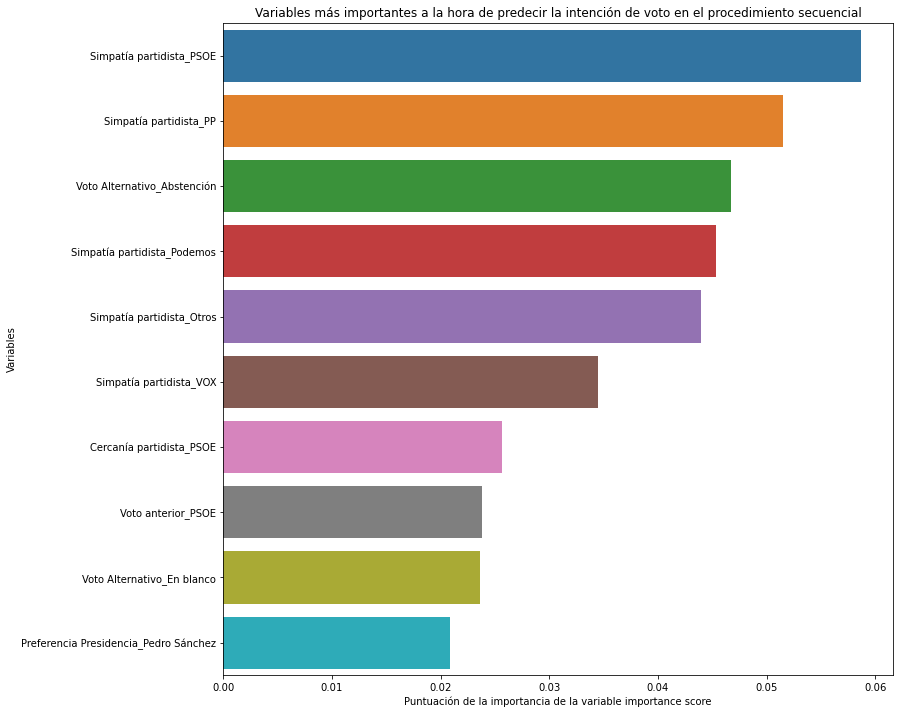

In [416]:
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.barplot(x=feature_10, y=feature_10.index, data=cis1)
ax.set_title("Variables más importantes a la hora de predecir la intención de voto en el procedimiento secuencial")
ax.set_yticklabels(feature_10.index)
ax.set_xlabel("Puntuación de la importancia de la variable importance score")
ax.set_ylabel("Variables")
plt.show(1)

In [340]:
acc_sec_1=accuracy_score(y_vot,y_pred_final_1)

In [341]:
acc_sec_2=accuracy_score(y_vot,y_pred_final_2)

In [342]:
acc_sec_3=accuracy_score(y_vot,y_pred_final_3)

In [343]:
y_vot.to_csv("/Users/fedemaldonado/Desktop/y_vot.csv")

In [344]:
np.save("/Users/fedemaldonado/Desktop/y_pred_final_1.npy",y_pred_final_1)

In [345]:
np.save("/Users/fedemaldonado/Desktop/y_pred_final_2.npy",y_pred_final_2)

In [346]:
np.save("/Users/fedemaldonado/Desktop/y_pred_final_3.npy",y_pred_final_3)

In [347]:
media_auc_secuencial = np.mean([acc_sec_1,acc_sec_2,acc_sec_3])
media_auc_secuencial

0.8926329699372316

In [348]:
st_error_sec = 0
for oob_auc in [acc_sec_1,acc_sec_2,acc_sec_3]:
    st_error_sec += (oob_auc-media_auc_secuencial)**2/(3-1)
    

In [349]:
st_error_sec

2.193669593414775e-05

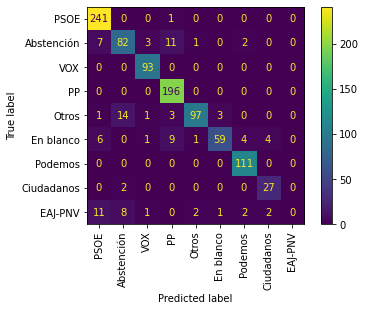

In [403]:
cm1_sec=confusion_matrix(y_vot,y_pred_final_1,labels=y_vot.unique().tolist())
disp = ConfusionMatrixDisplay(confusion_matrix=cm1_sec,
                             display_labels=y_vot.unique().tolist())
disp.plot(xticks_rotation="vertical")

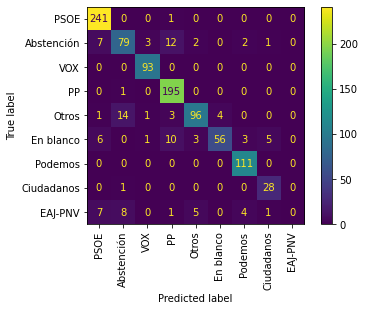

In [404]:
cm2_sec=confusion_matrix(y_vot,y_pred_final_2,labels=y_vot.unique().tolist())
disp = ConfusionMatrixDisplay(confusion_matrix=cm2_sec,
                             display_labels=y_vot.unique().tolist())

disp.plot(xticks_rotation="vertical")

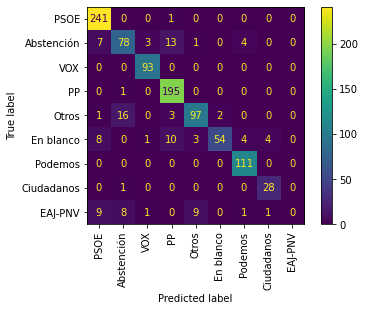

In [405]:
cm3_sec=confusion_matrix(y_vot,y_pred_final_3,labels = y_vot.unique().tolist())
disp = ConfusionMatrixDisplay(confusion_matrix=cm3_sec,
                             display_labels=y_vot.unique().tolist())
disp.plot(xticks_rotation="vertical")

In [416]:
cm_med

array([[241.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  7.  ,  79.67,   3.  ,  12.  ,   1.33,   0.  ,   2.67,   0.33,
          0.  ],
       [  0.  ,   0.  ,  93.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.67,   0.  , 195.33,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  1.  ,  14.67,   0.67,   3.  ,  96.67,   3.  ,   0.  ,   0.  ,
          0.  ],
       [  6.67,   0.  ,   1.  ,   9.67,   2.33,  56.33,   3.67,   4.33,
          0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  , 111.  ,   0.  ,
          0.  ],
       [  0.  ,   1.33,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  27.67,
          0.  ],
       [  9.  ,   8.  ,   0.67,   0.33,   5.33,   0.33,   2.33,   1.33,
          0.  ]])

In [431]:
cm_med = np.array([[241 ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ], [  7.  ,  79.67,   3.  ,  12.  ,   1.33,   0.  ,   2.67,   0.33,
          0.  ],[  0.  ,   0.  ,  93.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],[  0.  ,   0.67,   0.  , 195.33,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],[  1.  ,  14.67,   0.67,   3.  ,  96.67,   3.  ,   0.  ,   0.  ,
          0.  ],[  6.67,   0.  ,   1.  ,   9.67,   2.33,  56.33,   3.67,   4.33,
          0.  ],[  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  , 111.  ,   0.  ,
          0.  ],[  0.  ,   1.33,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  27.67,
          0.  ],[  9.  ,   8.  ,   0.67,   0.33,   5.33,   0.33,   2.33,   1.33,
          0.  ]])  

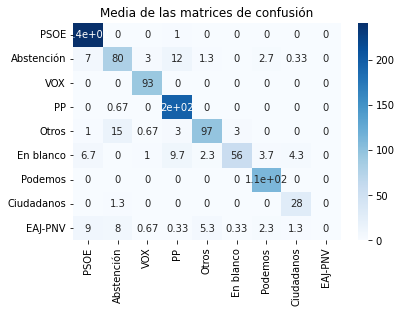

<Figure size 7200x7200 with 0 Axes>

In [436]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax = sns.heatmap(cm_med, annot=True, cmap='Blues')
ax.set_title('Media de las matrices de confusión');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['PSOE','Abstención', 'VOX', 'PP','Otros','En blanco', 'Podemos', 'Ciudadanos', 'EAJ-PNV'])
ax.yaxis.set_ticklabels(['PSOE','Abstención', 'VOX', 'PP','Otros','En blanco', 'Podemos', 'Ciudadanos', 'EAJ-PNV'])

## Display the visualization of the Confusion Matrix.
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.figure(figsize = (100,100))
plt.show()



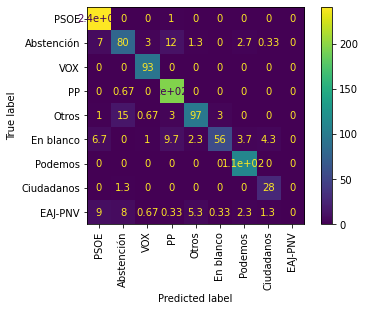

In [407]:
cm_med=(np.round(np.mean( np.array([cm1_sec, cm2_sec,cm3_sec ]), axis=0 ),2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_med,
                             display_labels=y_vot.unique().tolist())
disp.plot(xticks_rotation="vertical")

In [332]:
#Comprobación del proceso
M1_test.isna().any()

Sexo                                   False
Edad                                   False
Comunidad Autónoma                     False
Nacionalidad                           False
Preocupación sobre el Covid            False
Vacunación Covid                       False
Cargo de la Pandemia                   False
Valoración Covid PS                    False
Valoración Covid PC                    False
Valoración Covid YD                    False
Valoración Covid SA                    False
Valoración Covid IA                    False
Valoración Covid IE                    False
Economía Nacional                      False
Economía Personal                      False
Confianza Gobierno                     False
Confianza Oposición                    False
Preferencia Presidencia                False
Intención Voto                         False
Voto Alternativo                       False
Simpatía partidista                    False
Ideología personal                     False
Ideología 

In [155]:
from sklearn.model_selection import ParameterGrid

### Modelo Simple

In [156]:
variable = "Intención Voto"
#crear diccionario (otra forma Intencion_V = dict())
modelo_simple = {}
modelo_simple[variable] = {"params": [], "oob_auc": [], "model": []}
conjunto_simple = conjunto.copy()

# M = 1
np.random.seed(1)
X = conjunto_simple.drop(variable,axis=1)
y = conjunto_simple[variable]
X_dummies = pd.get_dummies(X)
modelo_simple[variable]["dummy_columns"]=X_dummies.columns
in_imp = conjunto_simple.loc[:,variable]=="NS/NC"
#~ --> lo contrario a 
X_train = X_dummies[~in_imp]
X_imp = X_dummies[in_imp]
le = LabelEncoder()
y_train = y[~in_imp]
y_encoded = le.fit_transform(y_train) 
modelo_simple[variable]["label_encoder"]=le
yarr = np.ravel(y_encoded)
param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,66,70,75,80,90,96,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados_c = {'params': [], 'oob_auc': [],'modelo': []}

for params in param_grid:
    modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

    modelo.fit(X_train,yarr)

    resultados_c['params'].append(params)
    resultados_c['oob_auc'].append(modelo.oob_score_)
    resultados_c['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
resultados_c = pd.DataFrame(resultados_c)
resultados_c = resultados_c.sort_values('oob_auc', ascending=False, ignore_index = True)
best_model_c = resultados_c.loc[0,"modelo"]
best_params_c= resultados_c.loc[0,'params']
best_oob_auc_c= resultados_c.loc[0,'oob_auc']
   
modelo_simple[variable]["params"].append(best_params_c)
modelo_simple[variable]["oob_auc"].append(best_oob_auc_c)
modelo_simple[variable]["model"].append(best_model_c)
    
    
y_pred = best_model_c.predict(X_imp)
y_pred_final = le.inverse_transform(y_pred)

# M = 2
np.random.seed(2)
X = conjunto_simple.drop(variable,axis=1)
y = conjunto_simple[variable]
X_dummies = pd.get_dummies(X)
modelo_simple[variable]["dummy_columns"]=X_dummies.columns
in_imp = conjunto_simple.loc[:,variable]=="NS/NC"
#~ --> lo contrario a 
X_train = X_dummies[~in_imp]
X_imp = X_dummies[in_imp]
le = LabelEncoder()
y_train = y[~in_imp]
y_encoded = le.fit_transform(y_train) 
modelo_simple[variable]["label_encoder"]=le
yarr = np.ravel(y_encoded)
param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,66,70,75,80,90,96,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados_c = {'params': [], 'oob_auc': [],'modelo': []}

for params in param_grid:
    modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

    modelo.fit(X_train,yarr)

    resultados_c['params'].append(params)
    resultados_c['oob_auc'].append(modelo.oob_score_)
    resultados_c['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
resultados_c = pd.DataFrame(resultados_c)
resultados_c = resultados_c.sort_values('oob_auc', ascending=False, ignore_index = True)
best_model_c = resultados_c.loc[0,"modelo"]
best_params_c= resultados_c.loc[0,'params']
best_oob_auc_c= resultados_c.loc[0,'oob_auc']
   
modelo_simple[variable]["params"].append(best_params_c)
modelo_simple[variable]["oob_auc"].append(best_oob_auc_c)
modelo_simple[variable]["model"].append(best_model_c)
    
    
y_pred = best_model_c.predict(X_imp)
y_pred_final = le.inverse_transform(y_pred)

# M = 3
np.random.seed(3)
X = conjunto_simple.drop(variable,axis=1)
y = conjunto_simple[variable]
X_dummies = pd.get_dummies(X)
modelo_simple[variable]["dummy_columns"]=X_dummies.columns
in_imp = conjunto_simple.loc[:,variable]=="NS/NC"
#~ --> lo contrario a 
X_train = X_dummies[~in_imp]
X_imp = X_dummies[in_imp]
le = LabelEncoder()
y_train = y[~in_imp]
y_encoded = le.fit_transform(y_train) 
modelo_simple[variable]["label_encoder"]=le
yarr = np.ravel(y_encoded)
param_grid = ParameterGrid(
                {'n_estimators':[20,40,60,62,66,70,75,80,90,96,100] ,
                 'max_features': ['sqrt',7,8,9,10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados_c = {'params': [], 'oob_auc': [],'modelo': []}

for params in param_grid:
    modelo = RandomForestClassifier(
            oob_score    = True,
            ** params
         )

    modelo.fit(X_train,yarr)

    resultados_c['params'].append(params)
    resultados_c['oob_auc'].append(modelo.oob_score_)
    resultados_c['modelo'].append(modelo)

    # Resultados
    # ==============================================================================
resultados_c = pd.DataFrame(resultados_c)
resultados_c = resultados_c.sort_values('oob_auc', ascending=False, ignore_index = True)
best_model_c = resultados_c.loc[0,"modelo"]
best_params_c= resultados_c.loc[0,'params']
best_oob_auc_c= resultados_c.loc[0,'oob_auc']
   
modelo_simple[variable]["params"].append(best_params_c)
modelo_simple[variable]["oob_auc"].append(best_oob_auc_c)
modelo_simple[variable]["model"].append(best_model_c)
    
    
y_pred = best_model_c.predict(X_imp)
y_pred_final = le.inverse_transform(y_pred)


/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/fedemaldonado/opt/anaconda3/lib/python3.9/site-pa

In [157]:
#Intención de voto
y_simple = test["Intención Voto"]

X_simple = test.drop("Intención Voto",axis=1)

X_simple_dummies = pd.get_dummies(X_simple)
dummy_columns = modelo_simple["Intención Voto"]["dummy_columns"]
X_simple_dummies=X_simple_dummies.reindex(columns = dummy_columns,fill_value = 0)
best_model_1=modelo_simple["Intención Voto"]["model"][0]
y_pred = best_model_1.predict(X_simple_dummies)
le = modelo_simple["Intención Voto"]["label_encoder"]
y_pred_final_simple_1 = le.inverse_transform(y_pred)

X_simple_dummies = pd.get_dummies(X_simple)
dummy_columns = modelo_simple["Intención Voto"]["dummy_columns"]
X_simple_dummies=X_simple_dummies.reindex(columns = dummy_columns,fill_value = 0)
best_model_2=modelo_simple["Intención Voto"]["model"][1]
y_pred = best_model_2.predict(X_simple_dummies)
le = modelo_simple["Intención Voto"]["label_encoder"]
y_pred_final_simple_2 = le.inverse_transform(y_pred)

X_simple_dummies = pd.get_dummies(X_simple)
dummy_columns = modelo_simple["Intención Voto"]["dummy_columns"]
X_simple_dummies=X_simple_dummies.reindex(columns = dummy_columns,fill_value = 0)
best_model_3=modelo_simple["Intención Voto"]["model"][2]
y_pred = best_model_3.predict(X_simple_dummies)
le = modelo_simple["Intención Voto"]["label_encoder"]
y_pred_final_simple_3 = le.inverse_transform(y_pred)

In [166]:
best_model_1=modelo_simple["Intención Voto"]["model"][0]

In [167]:
importances = best_model_1.feature_importances_

In [168]:
feature_scores = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

feature_10=feature_scores[0:10]
feature_10

Simpatía partidista_PSOE                 0.059606
Voto Alternativo_Abstención              0.046655
Simpatía partidista_VOX                  0.043093
Simpatía partidista_PP                   0.042004
Simpatía partidista_Otros                0.039114
Simpatía partidista_Podemos              0.035755
Voto anterior_PSOE                       0.033878
Cercanía partidista_PSOE                 0.025976
Voto Alternativo_En blanco               0.024958
Preferencia Presidencia_Pedro Sánchez    0.018065
dtype: float64

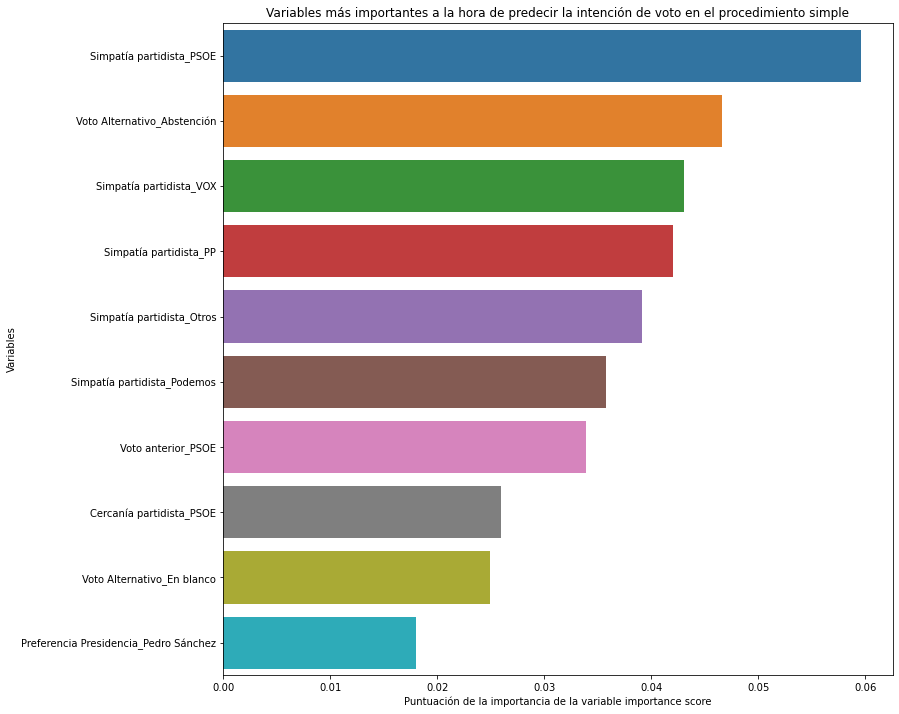

In [170]:
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.barplot(x=feature_10, y=feature_10.index, data=cis1)
ax.set_title("Variables más importantes a la hora de predecir la intención de voto en el procedimiento simple")
ax.set_yticklabels(feature_10.index)
ax.set_xlabel("Puntuación de la importancia de la variable importance score")
ax.set_ylabel("Variables")
plt.show(1)

In [158]:
acc_simple_1=accuracy_score(y_simple,y_pred_final_simple_1)

In [159]:
acc_simple_2=accuracy_score(y_simple,y_pred_final_simple_2)

In [160]:
acc_simple_3=accuracy_score(y_simple,y_pred_final_simple_3)

In [161]:
media_auc_simple = np.mean([acc_simple_1,acc_simple_2,acc_simple_3])
media_auc_simple

0.8972580112322431

In [164]:
st_error_sim = 0
for oob_auc in [acc_simple_1,acc_simple_2,acc_simple_3]:
    st_error_sim += (oob_auc-media_auc_simple)**2/(3-1)

In [165]:
st_error_sim

1.3096534886057592e-06

### Precisión de los modelos R.F.Simultáneo

In [ ]:
#Identificación patrones en la muestra test
test_copy=test.copy()
test_copy["Intención Voto"]="NS/NC"
test_copy.replace({"NS/NC":np.nan}, inplace = True)
nap=test_copy.isnull()
nap
label_patterns_test = np.zeros(len(test_copy))
for i in range(test_copy.shape[1]):
    label_patterns_test += nap.iloc[:,i]*2**(i+1)

label_patterns_test

In [ ]:
#Número de veces que se repite cada patron
label_patterns_test_df=pd.DataFrame(label_patterns_test.to_numpy(), columns = ["pattern"])

In [ ]:
labels_t=label_patterns_test_df["pattern"].unique()
labels_t.sort()
labels_t

In [ ]:
patterns_test = np.zeros([len(labels_t),test_copy.shape[1]])
for i in range(len(labels_t)):
    ii = label_patterns_test_df.index[label_patterns_test_df.pattern == labels_t[i]].tolist()
    patterns_test[i,:] = nap.iloc[ii[0],:]

patterns_test

In [ ]:
patterns_df_t=pd.DataFrame(patterns_test, columns = test_copy.columns,index = labels_t)
patterns_df_t

In [ ]:
#Obtención de las predicciones finales en la muestra test
M1_test_s = test.reset_index()
M2_test_s = test.reset_index()
M3_test_s = test.reset_index()
variables_a_imputar = [
    "Situación Laboral", "Nivel de estudios", "Vacunación Covid", "Estado Civil","Preocupación sobre el Covid",
    "Economía Personal","Participación Elecciones Anteriores","Economía Nacional","Religión","Cargo de la Pandemia",
    "Valoración PS","Confianza Oposición","Confianza Gobierno","Valoración PC","Valoración IE","Valoración IA","Clase Social",
    "Valoración SA","Valoración YD","Simpatía partidista","Preferencia Presidencia","Valoración Covid PS",
    "Cercanía partidista","Ideología IE","Ideología PC","Ideología personal","Ideología SA","Ideología PS","Ideología IA",
    "Valoración Covid PC","Valoración Covid YD","Ideología YD","Valoración Covid SA","Valoración Covid IA","Voto anterior",
    "Valoración Covid IE","Intención Voto","Voto Alternativo"
]

patterns_trans=patterns_df_t.transpose()

count_simult = 0
count_sec = 0

for patt in labels_t:
    variables = patterns_trans.loc[patterns_trans[patt]==1,patt].index.tolist()
    
    clients_in_patt = label_patterns_test_df[label_patterns_test_df["pattern"]==patt].index.tolist()
    
    if patt == 0:
        continue
    
    elif patt in mejores_modelos_simultaneo:
        count_simult +=1
        #M=1
        
        X = M1_test_s.loc[clients_in_patt, :].drop(variables,axis=1)
        X_dummies = pd.get_dummies(X)
        dummy_columns = mejores_modelos_simultaneo[patt]["dummy_columns"]
        X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
        best_model_1=mejores_modelos_simultaneo[patt]["modelo"][0]
        y_pred_final_s1 = best_model_1.predict(X_dummies)
        label_object = mejores_modelos_simultaneo[patt]["label_encoder"]
        
        y_pred_encoded_s1 = np.empty(y_pred_final_s1.shape,dtype = "str")
        for i,col in enumerate(variables):
            y_pred_encoded_s1[:,i] = label_object[col].inverse_transform(y_pred_final_s1[:,i])
        
        M1_test_s.loc[clients_in_patt,variables] = y_pred_encoded_s1
        
        #M=2
        
        X = M2_test_s.loc[clients_in_patt, :].drop(variables,axis=1)
        X_dummies = pd.get_dummies(X)
        dummy_columns = mejores_modelos_simultaneo[patt]["dummy_columns"]
        X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
        best_model_2=mejores_modelos_simultaneo[patt]["modelo"][1]
        y_pred_final_s2 = best_model_2.predict(X_dummies)
        label_object = mejores_modelos_simultaneo[patt]["label_encoder"]
        
        y_pred_encoded_s2= np.empty(y_pred_final_s2.shape,dtype = "str")
        for i,col in enumerate(variables):
            y_pred_encoded_s2[:,i] = label_object[col].inverse_transform(y_pred_final_s2[:,i])
        
        M2_test_s.loc[clients_in_patt,variables] = y_pred_encoded_s2
        
        #M=3
        
        X = M3_test_s.loc[clients_in_patt, :].drop(variables,axis=1)
        X_dummies = pd.get_dummies(X)
        dummy_columns = mejores_modelos_simultaneo[patt]["dummy_columns"]
        X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
        best_model_3=mejores_modelos_simultaneo[patt]["modelo"][2]
        y_pred_final_s3 = best_model_3.predict(X_dummies)
        label_object = mejores_modelos_simultaneo[patt]["label_encoder"]
        
        y_pred_encoded_s3= np.empty(y_pred_final_s3.shape,dtype = "str")
        for i,col in enumerate(variables):
            y_pred_encoded_s3[:,i] = label_object[col].inverse_transform(y_pred_final_s3[:,i])
        
        M3_test_s.loc[clients_in_patt,variables] = y_pred_encoded_s3
        
    else:
        count_sec +=1
        for variable in variables_a_imputar:
            if variable in variables:
            
                #M=1
                
                X = M1_test_s.loc[clients_in_patt, :].drop(variable,axis=1)
            
                X_dummies = pd.get_dummies(X)
                dummy_columns = modelo_secuencial[variable]["dummy_columns"]
                X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
                
                best_model_1=modelo_secuencial[variable]["model"][0]
                
                y_pred = best_model_1.predict(X_dummies)
                
                le = modelo_secuencial[variable]["label_encoder"]
                
                y_pred_final_1 = le.inverse_transform(y_pred)
            
                M1_test_s.loc[clients_in_patt,variable] = y_pred_final_1
                
                #M=2
                
                X = M2_test_s.loc[clients_in_patt, :].drop(variable,axis=1)
            
                X_dummies = pd.get_dummies(X)
                dummy_columns = modelo_secuencial[variable]["dummy_columns"]
                X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
                
                best_model_2=modelo_secuencial[variable]["model"][1]
                
                y_pred = best_model_2.predict(X_dummies)
                
                le = modelo_secuencial[variable]["label_encoder"]
                
                y_pred_final_2 = le.inverse_transform(y_pred)
            
                M2_test_s.loc[clients_in_patt,variable] = y_pred_final_2
                
                #M=3
                
                X = M3_test_s.loc[clients_in_patt, :].drop(variable,axis=1)
            
                X_dummies = pd.get_dummies(X)
                dummy_columns = modelo_secuencial[variable]["dummy_columns"]
                X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
                
                best_model_3=modelo_secuencial[variable]["model"][2]
                
                y_pred = best_model_3.predict(X_dummies)
                
                le = modelo_secuencial[variable]["label_encoder"]
                
                y_pred_final_3 = le.inverse_transform(y_pred)
            
                M3_test_s.loc[clients_in_patt,variable] = y_pred_final_3
        
        if "Intención Voto" in variables:
            
            variable = "Intención Voto"
            
            #M=1
                
            X = M1_test_s.loc[clients_in_patt, :].drop(variable,axis=1)
        
            X_dummies = pd.get_dummies(X)
            dummy_columns = modelo_secuencial_iteracion[variable]["dummy_columns"]
            X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
            
            best_model_1=modelo_secuencial_iteracion[variable]["model"][0]
            
            y_pred = best_model_1.predict(X_dummies)
            
            le = modelo_secuencial_iteracion[variable]["label_encoder"]
            
            y_pred_final_1 = le.inverse_transform(y_pred)
        
            M1_test_s.loc[clients_in_patt,variable] = y_pred_final_1
            
            #M=2
            
            X = M2_test_s.loc[clients_in_patt, :].drop(variable,axis=1)
        
            X_dummies = pd.get_dummies(X)
            dummy_columns = modelo_secuencial_iteracion[variable]["dummy_columns"]
            X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
            
            best_model_2=modelo_secuencial_iteracion[variable]["model"][1]
            
            y_pred = best_model_2.predict(X_dummies)
            
            le = modelo_secuencial_iteracion[variable]["label_encoder"]
            
            y_pred_final_2 = le.inverse_transform(y_pred)
        
            M2_test_s.loc[clients_in_patt,variable] = y_pred_final_2
            
            #M=3
            
            X = M3_test_s.loc[clients_in_patt, :].drop(variable,axis=1)
        
            X_dummies = pd.get_dummies(X)
            dummy_columns = modelo_secuencial_iteracion[variable]["dummy_columns"]
            X_dummies=X_dummies.reindex(columns = dummy_columns,fill_value = 0)
            
            best_model_3=modelo_secuencial_iteracion[variable]["model"][2]
            
            y_pred = best_model_3.predict(X_dummies)
            
            le = modelo_secuencial_iteracion[variable]["label_encoder"]
            
            y_pred_final_3 = le.inverse_transform(y_pred)
        
            M3_test_s.loc[clients_in_patt,variable] = y_pred_final_3

In [ ]:
#Intención de voto simult
y_vot_s = test["Intención Voto"]

y_pred_final_s1 = M1_test_s["Intención Voto"]
y_pred_final_s2 = M2_test_s["Intención Voto"]
y_pred_final_s3 = M3_test_s["Intención Voto"]

In [ ]:
acc_sim_1=accuracy_score(y_vot_s,y_pred_final_s1)

In [ ]:
acc_sim_2=accuracy_score(y_vot_s,y_pred_final_s2)

In [ ]:
acc_sim_3=accuracy_score(y_vot_s,y_pred_final_s3)

In [ ]:
media_auc_simultaneo = np.mean([acc_sim_1,acc_sim_2,acc_sim_3])

In [ ]:
st_error_simult = 0
for oob_auc in [acc_sec_1,acc_sec_2,acc_sec_3]:
    st_error_simult += (oob_auc-media_auc_simultaneo)**2/(3-1)

In [ ]:
st_error_simult

### Estimación de Intención de Voto

In [351]:
estimacion_voto_sec1=pd.concat([M1_c["Intención Voto"],test["Intención Voto"]])
estimacion_voto_sec2=pd.concat([M2_c["Intención Voto"],test["Intención Voto"]])
estimacion_voto_sec3=pd.concat([M3_c["Intención Voto"],test["Intención Voto"]])

In [ ]:
#estimacion_voto_sec1.value_counts(normalize=True)

In [378]:
#media PP
prop_PP_M1 = sum((estimacion_voto_sec1 == "PP")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "PP")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "PP")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.1858

In [379]:
#Error Estándar PP
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.007

In [381]:
#media PSOE
prop_PP_M1 = sum((estimacion_voto_sec1 == "PSOE")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "PSOE")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "PSOE")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.2652

In [382]:
#Error Estándar PSOE
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.009

In [383]:
#media PODEMOS
prop_PP_M1 = sum((estimacion_voto_sec1 == "Podemos")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "Podemos")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "Podemos")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.1172

In [384]:
#Error Estándar Podemos
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.006

In [385]:
#media Vox
prop_PP_M1 = sum((estimacion_voto_sec1 == "VOX")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "VOX")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "VOX")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.1043

In [386]:
#Error Estándar vox
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.006

In [387]:
#media ciudadanos
prop_PP_M1 = sum((estimacion_voto_sec1 == "Ciudadanos")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "Ciudadanos")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "Ciudadanos")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.0357

In [388]:
#Error Estándar ciudadanos
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.003

In [389]:
#media En blanco
prop_PP_M1 = sum((estimacion_voto_sec1 == "En blanco")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "En blanco")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "En blanco")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.076

In [390]:
#Error Estándar En Blanco
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.005

In [391]:
#media Otros
prop_PP_M1 = sum((estimacion_voto_sec1 == "Otros")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "Otros")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "Otros")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.1669

In [392]:
#Error Estándar Otros
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.013

In [393]:
#media ERC
prop_PP_M1 = sum((estimacion_voto_sec1 == "ERC")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "ERC")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "ERC")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.0235

In [394]:
#Error Estándar ERC
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.003

In [395]:
#media JxCat
prop_PP_M1 = sum((estimacion_voto_sec1 == "JxCat")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "JxCat")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "JxCat")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.008

In [396]:
#Error Estándar JxCat
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.002

In [397]:
#media EAJ-PNV
prop_PP_M1 = sum((estimacion_voto_sec1 == "EAJ-PNV")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "EAJ-PNV")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "EAJ-PNV")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.0091

In [398]:
#Error Estándar EAJ-PNV
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.002

In [399]:
#media Más País
prop_PP_M1 = sum((estimacion_voto_sec1 == "Más País")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
prop_PP_M2 = sum((estimacion_voto_sec2 == "Más País")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
prop_PP_M3 = sum((estimacion_voto_sec3 == "Más País")*(cis1["Peso"]).values)/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
mean_PP= np.round(np.mean([prop_PP_M1, prop_PP_M2,prop_PP_M3 ]),4)
mean_PP

0.0057

In [400]:
#Error Estándar Más País
W_PP_M1 = (prop_PP_M1*(1-prop_PP_M1))/(3777 - sum(estimacion_voto_sec1 == "Abstención"))
W_PP_M2 = (prop_PP_M2*(1-prop_PP_M2))/(3777 - sum(estimacion_voto_sec2 == "Abstención"))
W_PP_M3 = (prop_PP_M3*(1-prop_PP_M3))/(3777 - sum(estimacion_voto_sec3 == "Abstención"))
W_PP = np.mean([W_PP_M1, W_PP_M2,W_PP_M3 ])


B_pp1=(prop_PP_M1-mean_PP)**2/(3-1)
B_pp2=(prop_PP_M2-mean_PP)**2/(3-1)
B_pp3=(prop_PP_M3-mean_PP)**2/(3-1)

B_PP = (B_pp1+B_pp2+B_pp3)


se_PP = round((W_PP+B_PP+(B_PP/3))**(1/2),3)
se_PP

0.001